In [ ]:
! pip install scipy

In [ ]:
! pip install matplotlib 

In [1]:
import json
import numpy as np
import pandas as pd
from src.pyipums.parse_xml import read_ipums_ddi
from ipumspy import readers, ddi
from matplotlib import pyplot as plt

In [2]:
ddi_file_path = "./cps_00003.xml"
data_file_path = "./cps_00003.dat.gz"

In [3]:
cps_ddi = read_ipums_ddi(ddi_file_path)
ddi_codebook = readers.read_ipums_ddi(ddi_file_path)

/Users/franciscojavierarceo/.pyenv/versions/3.8.16/lib/python3.8/site-packages/ipumspy/readers.py:47: CitationWarning: Use of data from IPUMS is subject to conditions including that users should cite the data appropriately.
See the `ipums_conditions` attribute of this codebook for terms of use.
See the `ipums_citation` attribute of this codebook for the appropriate citation.
  warnings.warn(


In [4]:
print(ddi_codebook.ipums_citation)

Publications and research reports based on the IPUMS-CPS database must cite it appropriately. The citation should include the following:

Sarah Flood, Miriam King, Renae Rodgers, Steven Ruggles, J. Robert Warren and Michael Westberry. Integrated Public Use Microdata Series, Current Population Survey: Version 10.0 [dataset]. Minneapolis, MN: IPUMS, 2022. https://doi.org/10.18128/D030.V10.0

The licensing agreement for use of IPUMS-CPS data requires that users supply us with the title and full citation for any publications, research reports, or educational materials making use of the data or documentation. Please add your citation to the IPUMS bibliography: http://bibliography.ipums.org/


In [5]:
', '.join(sorted(cps_ddi['columns']))

'ABSENT, ACTCCRD, ACTSAME, ADJGINC, AGE, AHRSWORK1, AHRSWORK2, AHRSWORKT, ANYCOVLY, ANYCOVNW, ANYPART, ASECFLAG, ASECFWT, ASECWT, ASECWTH, ASIAN, ASPOUSE, ATELUNCH, BPL, CAIDLY, CAIDPART, CBSASZ, CITIZEN, CLASSWKR, CLASSWLY, COMPWT, COUNTY, CPSID, CPSIDP, CTCCRD, CUTOFF, DEPSTAT, DIFFANY, DIFFCARE, DIFFEYE, DIFFHEAR, DIFFMOB, DIFFPHYS, DIFFREM, DISABWRK, DURUNEM2, DURUNEMP, EARNWT, EDCYC, EDDIPGED, EDHGCGED, EDUC, EDUC99, EITCRED, ELDCH, EMPSAME, EMPSTAT, FAMID, FAMINC, FAMREL, FAMSIZE, FAMUNIT, FBPL, FEDTAX, FEDTAXAC, FICA, FILESTAT, FIRMSIZE, FOODSTAMP, FOODSTMP, FRELUNCH, FTOTVAL, FTYPE, FULLPART, GOTVDISA, GOTVEDUC, GOTVOTHE, GOTVPENS, GOTVSURV, GOTWIC, GQTYPE, HEALTH, HEATSUB, HEATVAL, HHINCOME, HHINTYPE, HHRESPLN, HICHAMP, HIMCAIDLY, HIMCAIDNW, HIMCARELY, HIMCARENW, HIPVAL, HISPAN, HIUFPGBASE, HIUFPGINC, HIUID, HIUNPERS, HIURULE, HRHHID, HRHHID2, HSEQ, HWTFINL, INCASIST, INCBUS, INCCHILD, INCDISA1, INCDISA2, INCDISAB, INCDIVID, INCEDUC, INCFARM, INCINT, INCLONGJ, INCOTHER, INCPEN

In [6]:
print(ddi_codebook.data_description[-1])

VariableDescription(id='KIDCNEED', name='KIDCNEED', rectype='', codes={'NIU': 0, 'No': 1, 'Yes': 2}, start=2947, end=2948, label='Child needed care while parent worked', description='KIDCNEED identifies children (under 14) who were reported to need paid child care while their parent(s) worked.  Interviewers first asked whether anyone in the household paid for the care of their children while working during the previous calendar year, and, if the answer was affirmative, asked, "Which children needed care while their parents worked?"  Preschool and nursery school counted as "paid child care"; kindergarten and grade/elementary school did not.\n\nThe variable KIDCARE, which is one of the "new welfare reform variables" added to the ASEC CPS beginning in 2001, indicates whether adults received, from a state or county welfare agency, assistance in the form of child care services so they could go to work or school or training.  The codebooks for the ASEC CPS public use files also group KIDCNEE

In [7]:
ddi_codebook.get_variable_info('YEAR')

VariableDescription(id='YEAR', name='YEAR', rectype='', codes={}, start=0, end=4, label='Survey year', description='YEAR reports the year in which the survey was conducted.  YEARP is repeated on person records.', concept='Technical Variables -- HOUSEHOLD', vartype='numeric', notes='', shift=0)

In [8]:
xvars = [
    'AGE', 
    'ADJGINC', 
    'ASECWT', 
    'ASECWTH', 
    'ASIAN', 
    'ASECFWT', 
    'STATEFIP', 
    'TAXINC', 
    'UHRSWORK1', 
    'RACE', 
    'SEX', 
    'SRCWELFR', 
    'YEAR',
    'FOODSTAMP', 
    'STAMPVAL', 
    'WTFINL', 
    'BPL', 
    'HISPAN', 
    'EMPSTAT', 
    'LABFORCE', 
    'OCC', 
    'MARST',
    'VETSTAT',
    'CITIZEN',
    'NATIVITY',
    'CLASSWKR',
    'WKSTAT',
    'EDUC',
    'OFFPOV',
    'EARNWT',
    'INCWAGE',
    'INCBUS',
    'INCFARM',
    'INCSS',
    'INCWELFR',
    'INCRETIR',
    'INCSSI',
    'INCINT',
    'INCUNEMP',
    'INCWKCOM',
    'INCVET',
    'INCSURV',
    'INCDISAB',
    'INCDIVID',
    'INCRENT',
    'INCEDUC',
    'INCCHILD',
    'INCASIST',
    'INCOTHER',
    'INCRANN',
    'INCPENS',
    'INCTOT',
]
# print(ddi_codebook)
ipums_df = readers.read_microdata(
    ddi_codebook,
    data_file_path,
    nrows=1e7,
    subset=xvars,
)
print(ipums_df)

         YEAR  ASECWTH  STATEFIP  STAMPVAL     WTFINL  ASECWT  AGE  SEX  RACE  \
0        2022      NaN         1      <NA>  1662.5757     NaN   36    2   100   
1        2022      NaN         1      <NA>  1978.1985     NaN   41    1   100   
2        2022      NaN         1      <NA>  1801.0842     NaN    5    2   100   
3        2022      NaN         1      <NA>  1243.6042     NaN    7    2   100   
4        2022      NaN         1      <NA>  2037.9611     NaN   50    2   200   
...       ...      ...       ...       ...        ...     ...  ...  ...   ...   
1869174  2023      NaN        56      <NA>   339.3124     NaN   43    2   100   
1869175  2023      NaN        56      <NA>   382.6062     NaN   46    1   100   
1869176  2023      NaN        56      <NA>   370.9985     NaN   50    2   100   
1869177  2023      NaN        56      <NA>   341.6635     NaN   74    1   100   
1869178  2023      NaN        56      <NA>   324.7941     NaN   71    2   100   

         MARST  ...  INCCHI

In [9]:
df = ipums_df[ipums_df['ASECWT'].isnull()==False].reset_index(drop=True)

In [10]:
invalids = {
    'INCSS':    999999,
    'INCWELFR': 999999.0,
    'INCRETIR': np.nan ,
    'INCSSI':   999999.0,
    'INCINT':   9999999.0,
    'INCUNEMP': 999999.0,
    'INCWKCOM': 999999.0,
    'INCVET':   9999999.0,
    'INCSURV':  9999999.0,
    'INCDISAB': 9999999,
    'INCDIVID': 9999999.0,
    'INCRENT':  9999999.0,
    'INCEDUC':  999999.0,
    'INCCHILD': 999999.0,
    'INCASIST': 9999999.0,
    'INCOTHER': 9999999.0,
    'INCRANN':  999999.0,
    'INCPENS':  999999.0,
    'TAXINC': 9999999.0,
    'INCTOT': np.nan,
    'INCWAGE': np.nan,
    'INCBUS': np.nan,
    'INCFARM': np.nan,
    'ADJGINC': np.nan,
}
for col in df.columns:
    if 'INC' in col:
        f = (df[col] == 99999999) | (df[col] ==999999999) | (df[col] == invalids[col])
        df[f"{col}_2"] = np.where(f, np.nan, df[col]) 

In [11]:
def pt(ddi: ddi.Codebook, df: pd.DataFrame, xvar: str, wvar: str=None):
    codex = pd.DataFrame.from_dict(ddi.get_variable_info(xvar).codes, orient='index', columns=['code'])
    codex.reset_index(inplace=True)
    codex.rename({"index": xvar}, axis=1, inplace=True)
    if wvar:
        aggdf = df[[xvar, wvar]].groupby(by=xvar, as_index=False).agg({wvar: [np.sum, len]})
        aggdf.columns = ['_'.join([y for y in j if y != '']) for j in aggdf.columns]
        aggdf.rename({xvar: "code", f"{wvar}_sum": "count", f"{wvar}_len": "raw_count"}, inplace=True, axis=1)
        aggdf['raw_percent'] = aggdf['raw_count'] / aggdf['raw_count'].sum()
    else:
        aggdf = pd.DataFrame(
            df[xvar].value_counts().reset_index()
        ).rename({"index": 'code', xvar: 'count'}, axis=1)
    aggdf['Percent'] = aggdf['count'] / aggdf['count'].sum()
    outdf = aggdf.merge(codex, how='left', left_on='code', right_on='code')    
    outdf.sort_values(by='count', ascending=False, inplace=True)
    outdf.reset_index(drop=True, inplace=True)
    outdf = outdf[[xvar] + outdf.columns[0:-1].to_list()]
    return outdf

In [12]:
def ptbarplot(ddi, df, xvar, wvar, color='blue', out=False):
    x = pt(ddi, df, xvar, wvar)
    ylabel = ddi.get_variable_info(xvar).label.title()
    x['Percent'] = (x['Percent'] * 100.).round(2)

    y = x[['Percent', xvar]].sort_values(by='Percent', ascending=False).reset_index(drop=True).loc[0:30]
    ax = y.sort_values(by='Percent').plot.barh(x=xvar, color=color, figsize=(12, 8))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%', padding=2)

    plt.legend(loc='lower right')
    plt.ylabel(ylabel)
    plt.xlabel("Percent of ASEC Sample")
    plt.show()    
    if out:
        return x

In [13]:
ipums_df.columns

Index(['YEAR', 'ASECWTH', 'STATEFIP', 'STAMPVAL', 'WTFINL', 'ASECWT', 'AGE',
       'SEX', 'RACE', 'MARST', 'ASIAN', 'VETSTAT', 'BPL', 'CITIZEN',
       'NATIVITY', 'HISPAN', 'EMPSTAT', 'LABFORCE', 'OCC', 'CLASSWKR',
       'UHRSWORK1', 'WKSTAT', 'EDUC', 'EARNWT', 'ASECFWT', 'INCTOT', 'INCWAGE',
       'INCBUS', 'INCFARM', 'INCSS', 'INCWELFR', 'INCRETIR', 'INCSSI',
       'INCINT', 'INCUNEMP', 'INCWKCOM', 'INCVET', 'INCSURV', 'INCDISAB',
       'INCDIVID', 'INCRENT', 'INCEDUC', 'INCCHILD', 'INCASIST', 'INCOTHER',
       'INCRANN', 'INCPENS', 'SRCWELFR', 'ADJGINC', 'TAXINC', 'OFFPOV',
       'FOODSTAMP'],
      dtype='object')

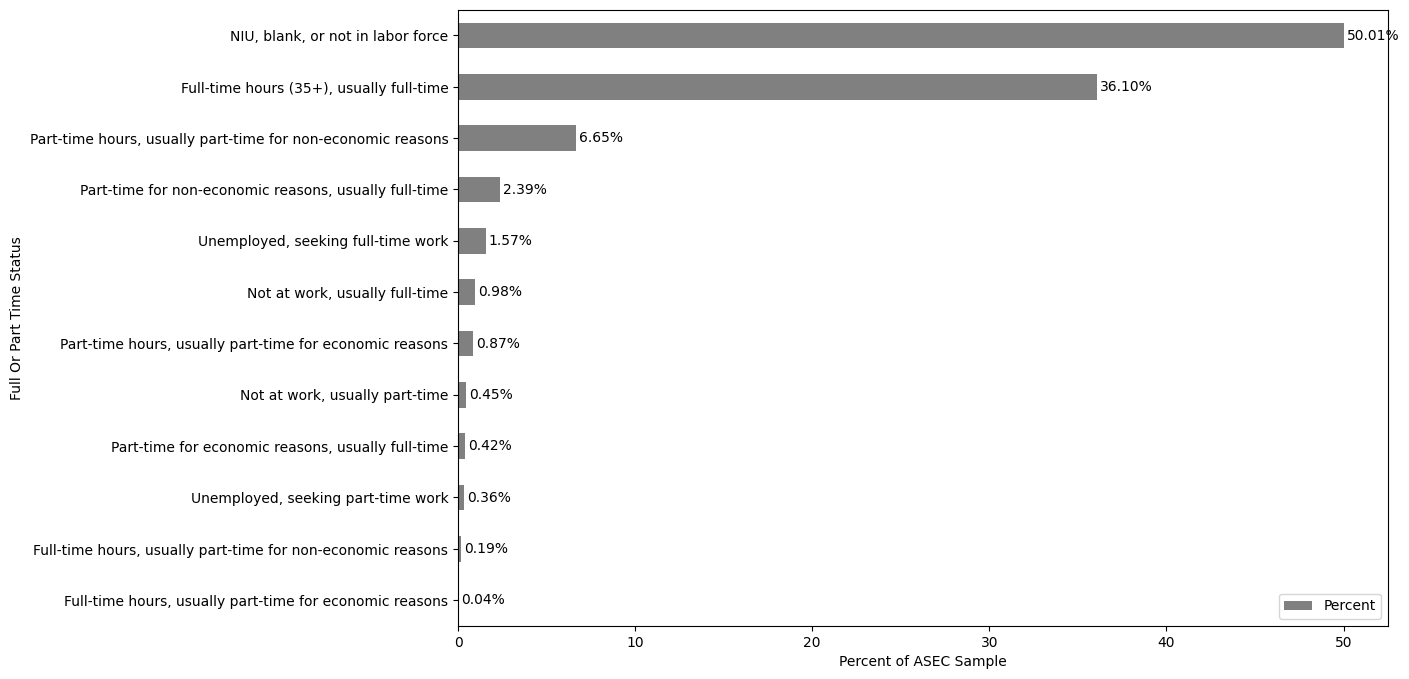

In [14]:
ptbarplot(ddi_codebook, df, 'WKSTAT', 'ASECWT', color='gray')

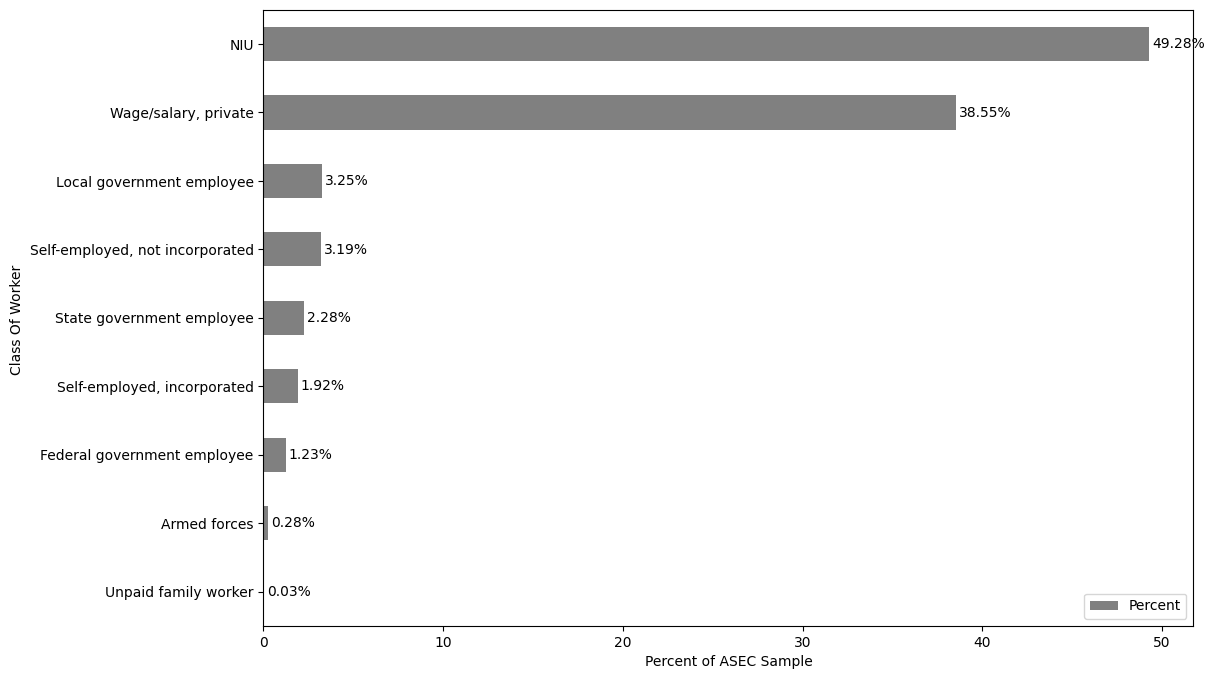

In [15]:
ptbarplot(ddi_codebook, df, 'CLASSWKR', 'ASECWT', color='gray')

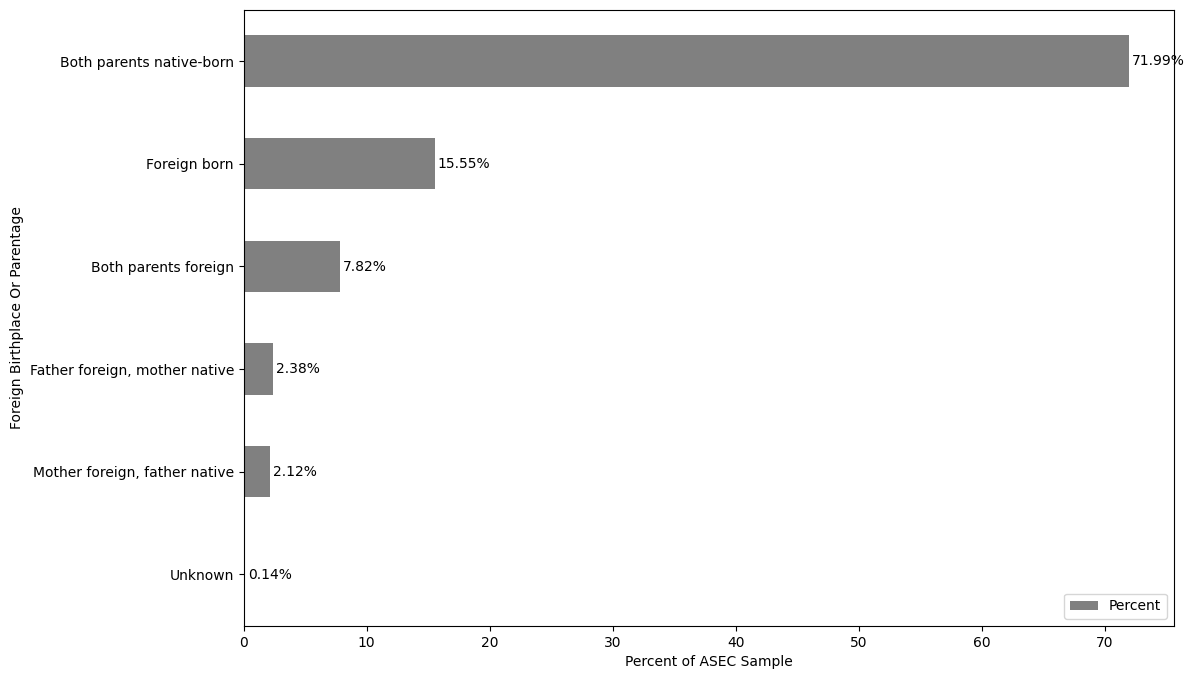

In [16]:
ptbarplot(ddi_codebook, df, 'NATIVITY', 'ASECWT', color='gray')

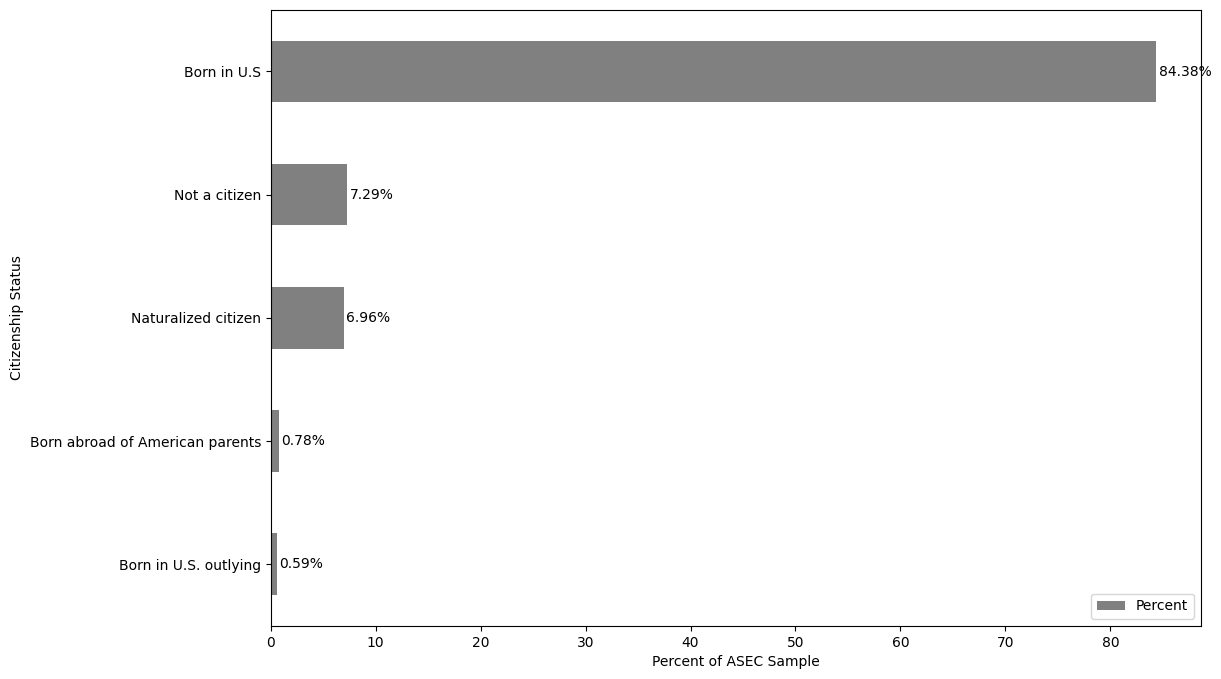

In [17]:
ptbarplot(ddi_codebook, df, 'CITIZEN', 'ASECWT', color='gray')

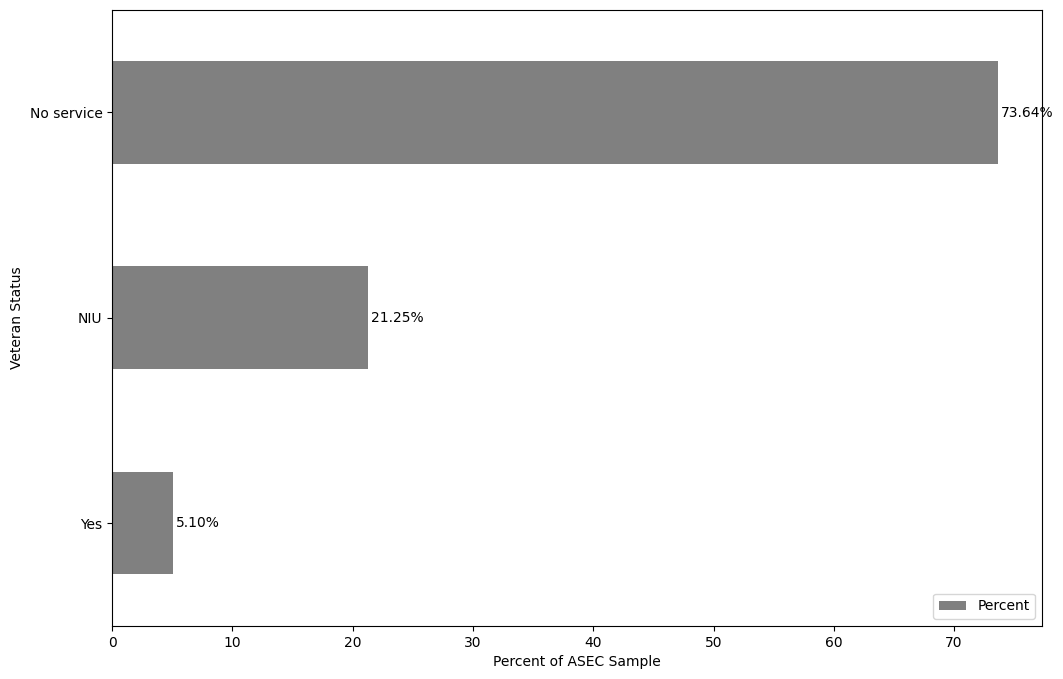

In [18]:
ptbarplot(ddi_codebook, df, 'VETSTAT', 'ASECWT', color='gray')

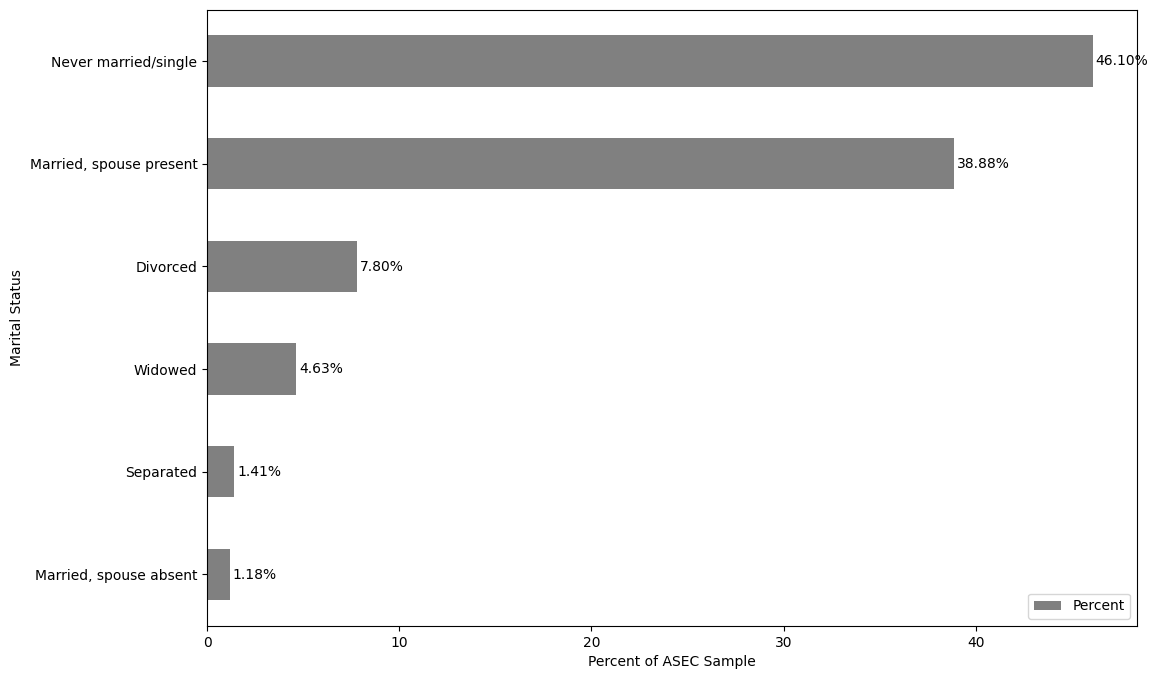

In [19]:
ptbarplot(ddi_codebook, df, 'MARST', 'ASECWT', color='gray')

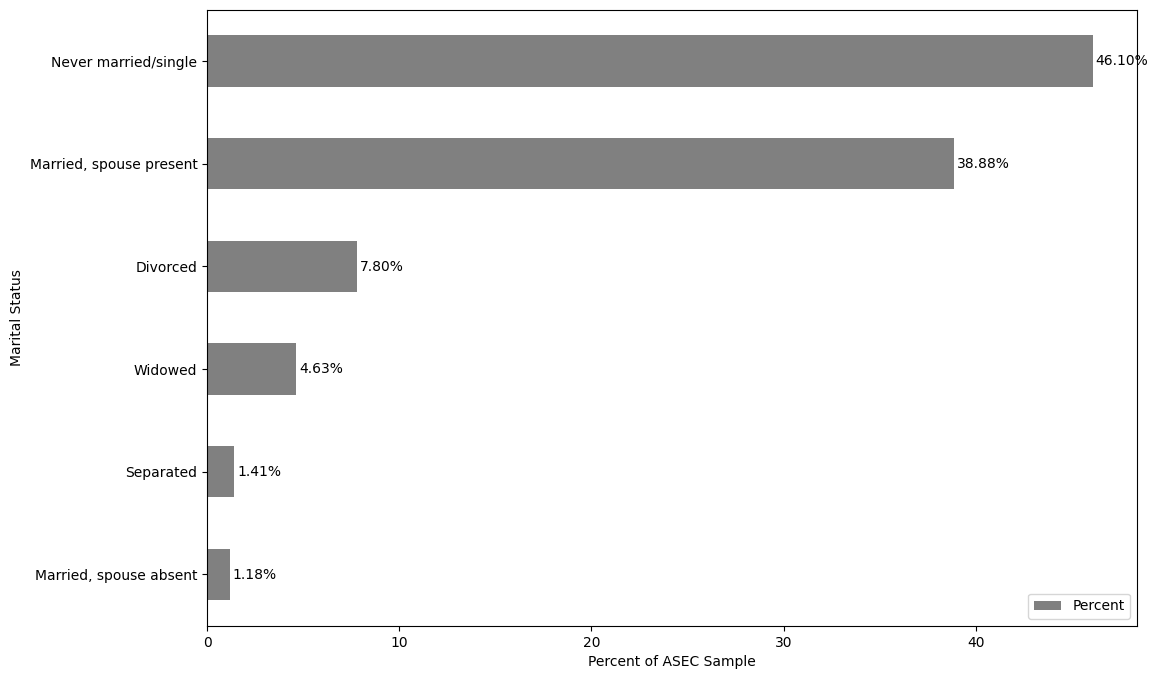

In [20]:
ptbarplot(ddi_codebook, df, 'MARST', 'ASECWT', color='gray')

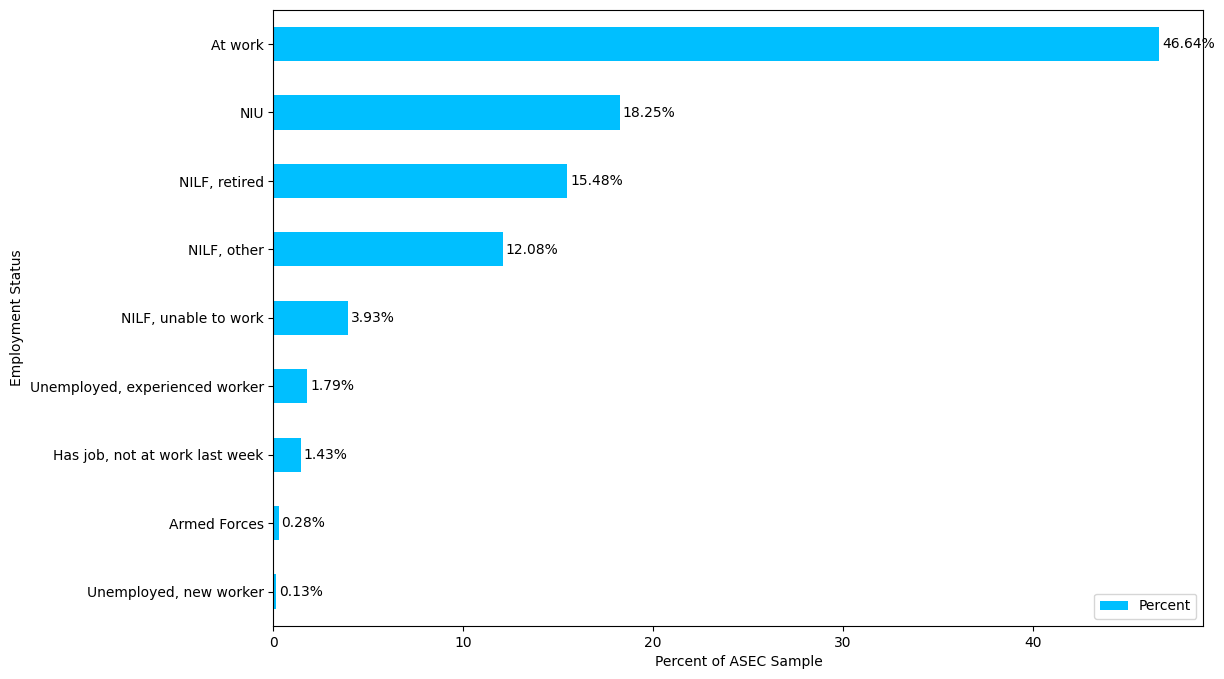

In [21]:
ptbarplot(ddi_codebook, df, 'EMPSTAT', 'ASECWT', color='deepskyblue')

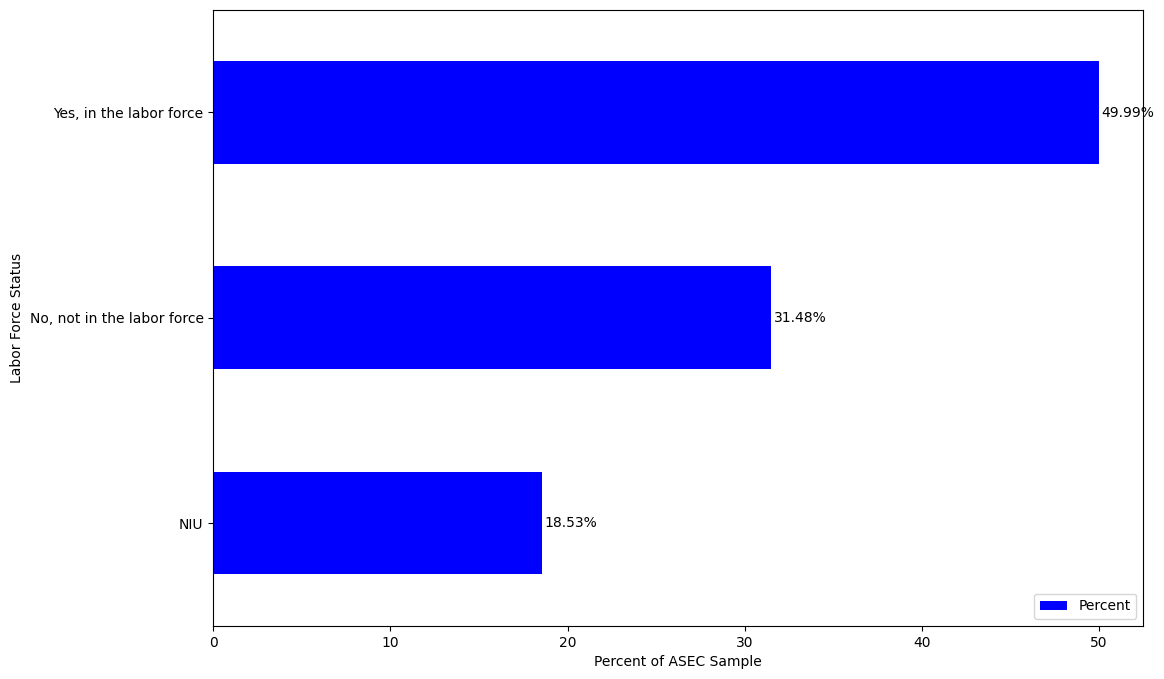

In [22]:
ptbarplot(ddi_codebook, df, 'LABFORCE', 'ASECWT', color='blue')

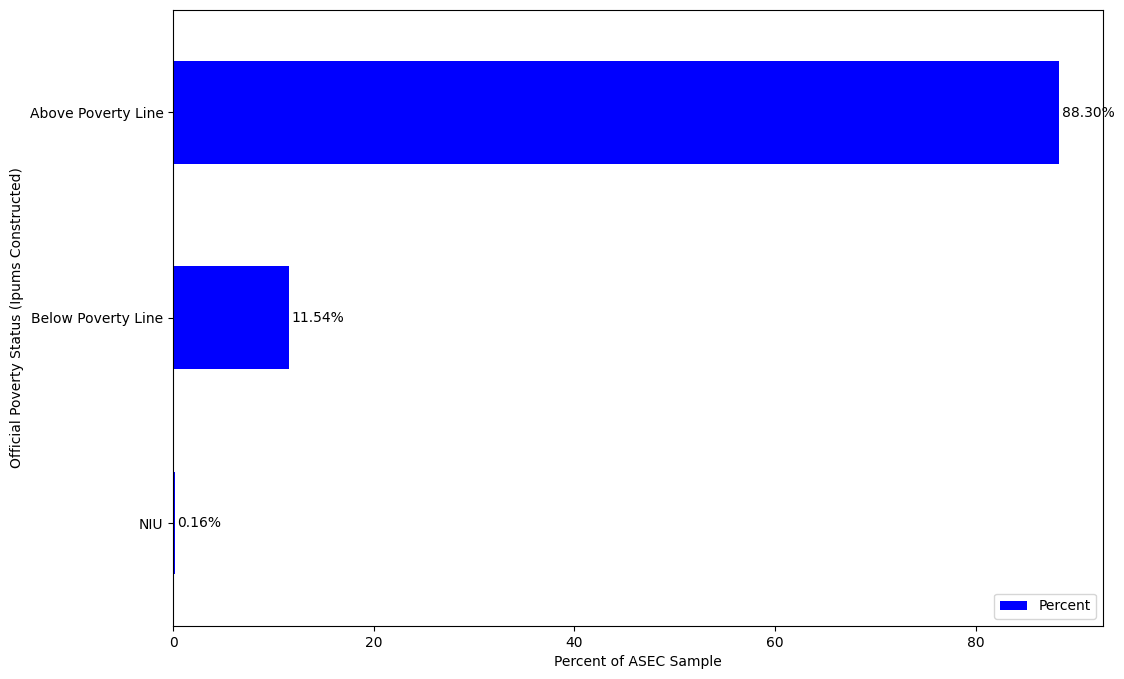

In [23]:
ptbarplot(ddi_codebook, df, 'OFFPOV', 'ASECWT', color='blue')

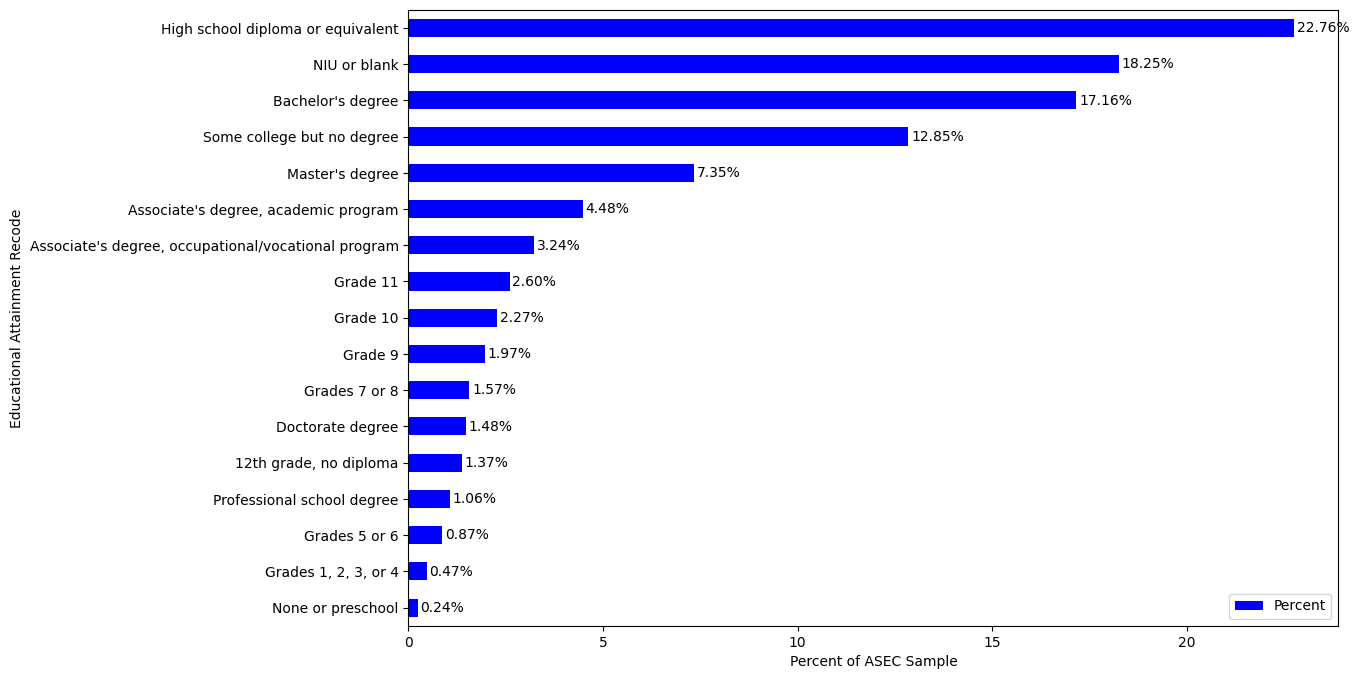

In [24]:
ptbarplot(ddi_codebook, df, 'EDUC', 'ASECWT',  color='blue')

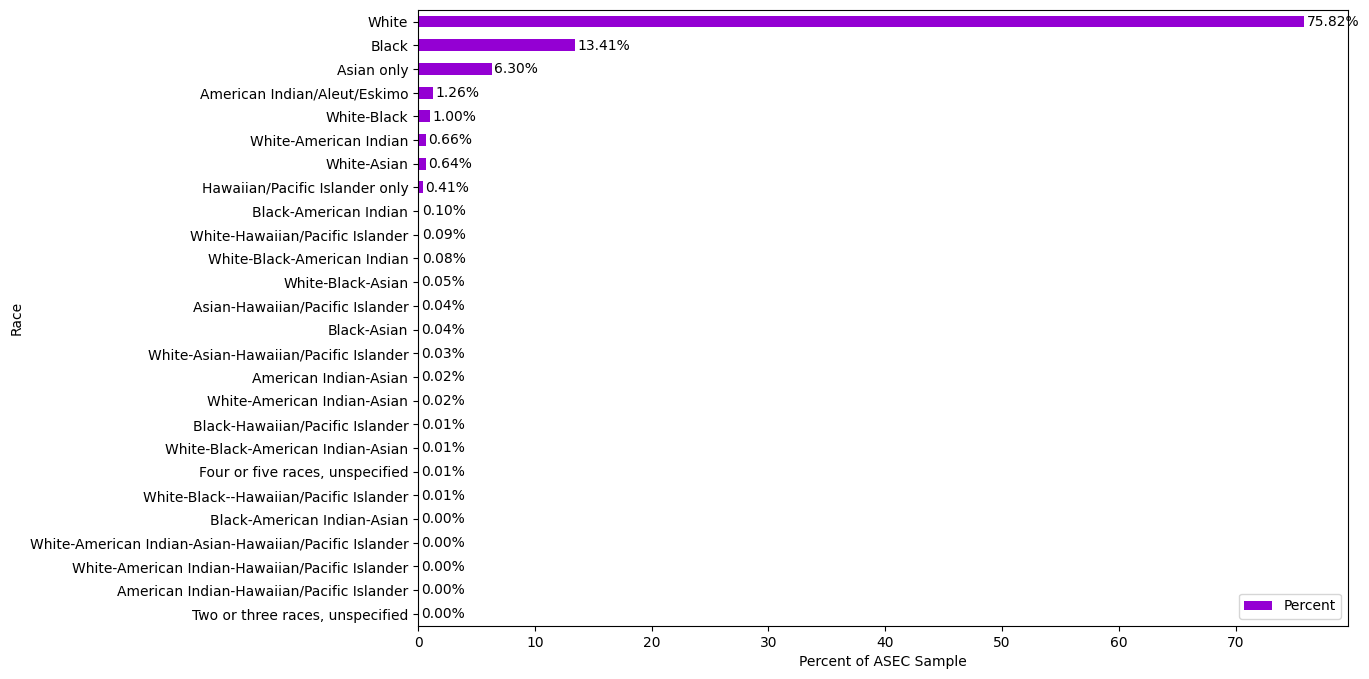

In [25]:
ptbarplot(ddi_codebook, df, 'RACE', 'ASECWT', color='darkviolet')

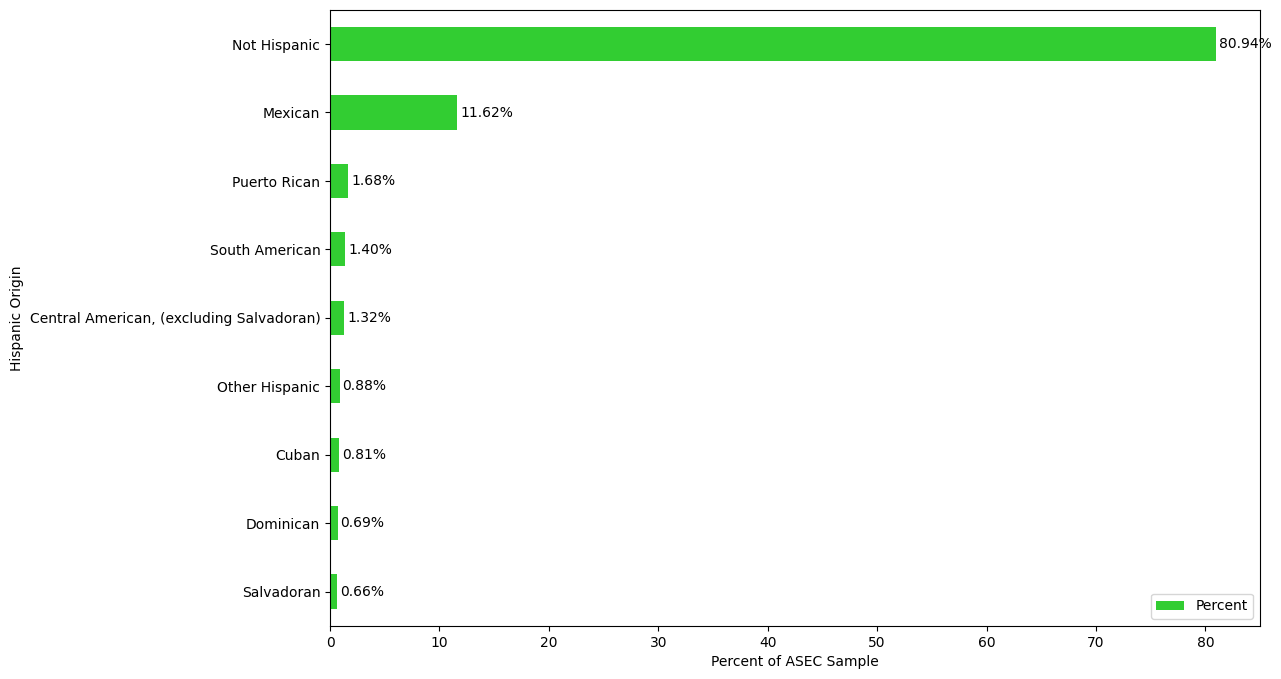

In [26]:
ptbarplot(ddi_codebook, df, 'HISPAN', 'ASECWT', color='limegreen')

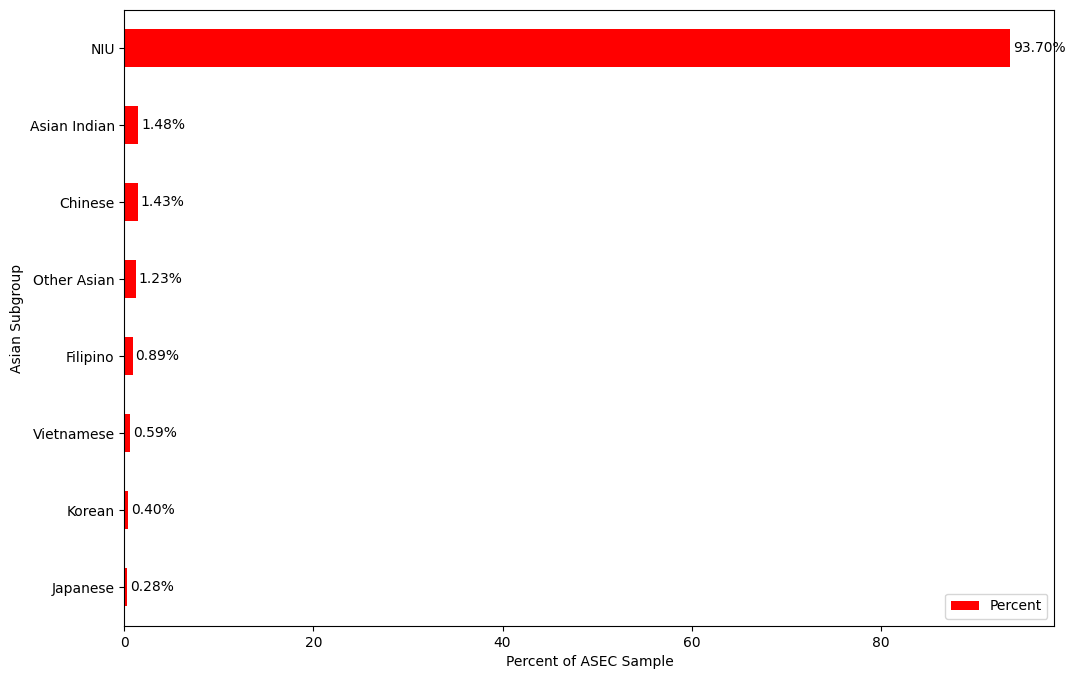

In [27]:
ptbarplot(ddi_codebook, df, 'ASIAN', 'ASECWT', color='red')

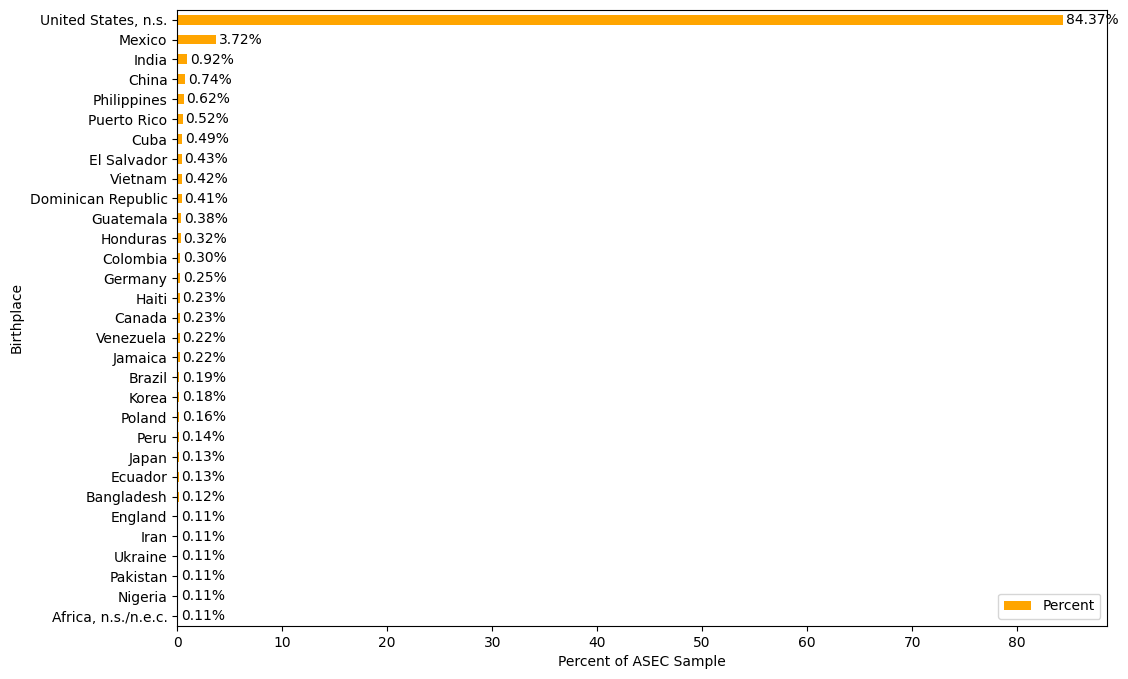

In [28]:
ptbarplot(ddi_codebook, df, 'BPL', 'ASECWT', color='orange')

<Axes: >

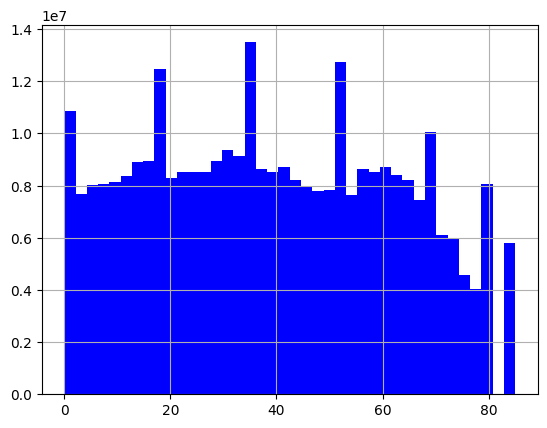

In [30]:
df['AGE'].hist(weights=df['ASECWT'], color='blue', bins=40)

count     121119
unique     35193
top            0
freq       14476
Name: INCTOT_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


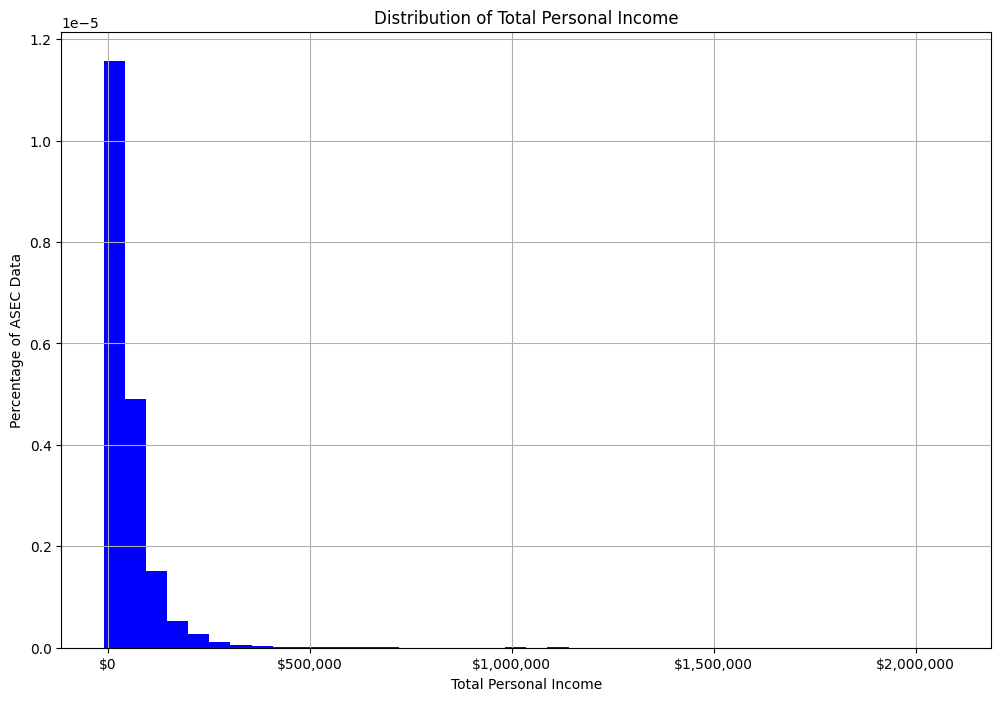

count     121119
unique      3543
top            0
freq       49692
Name: INCWAGE_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


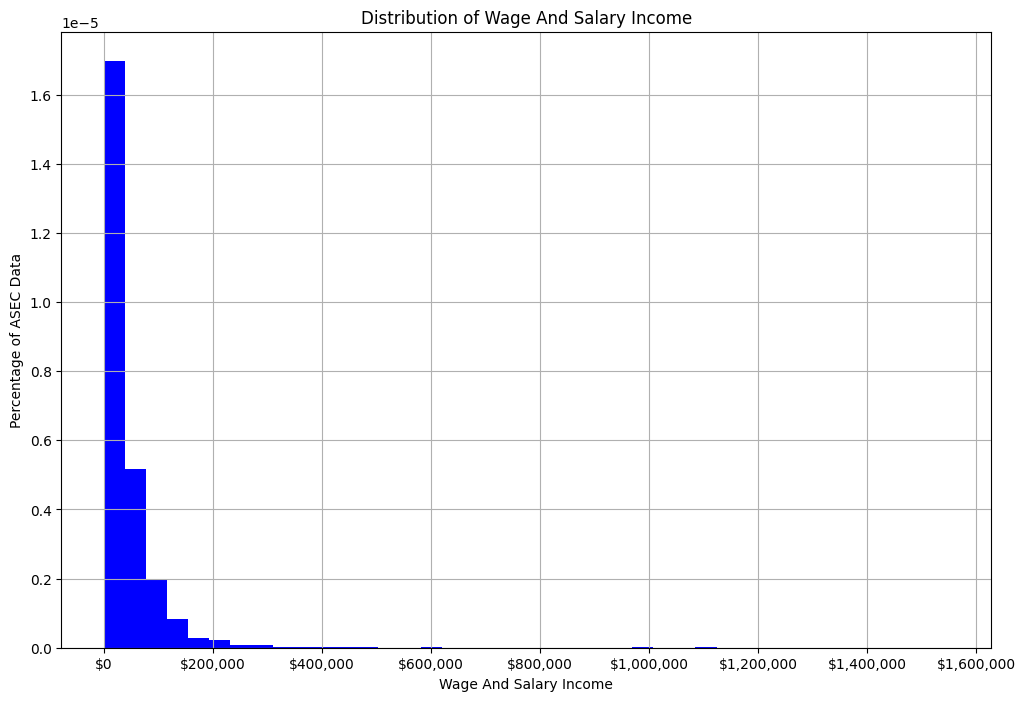

count     121119
unique       403
top            0
freq      115395
Name: INCBUS_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


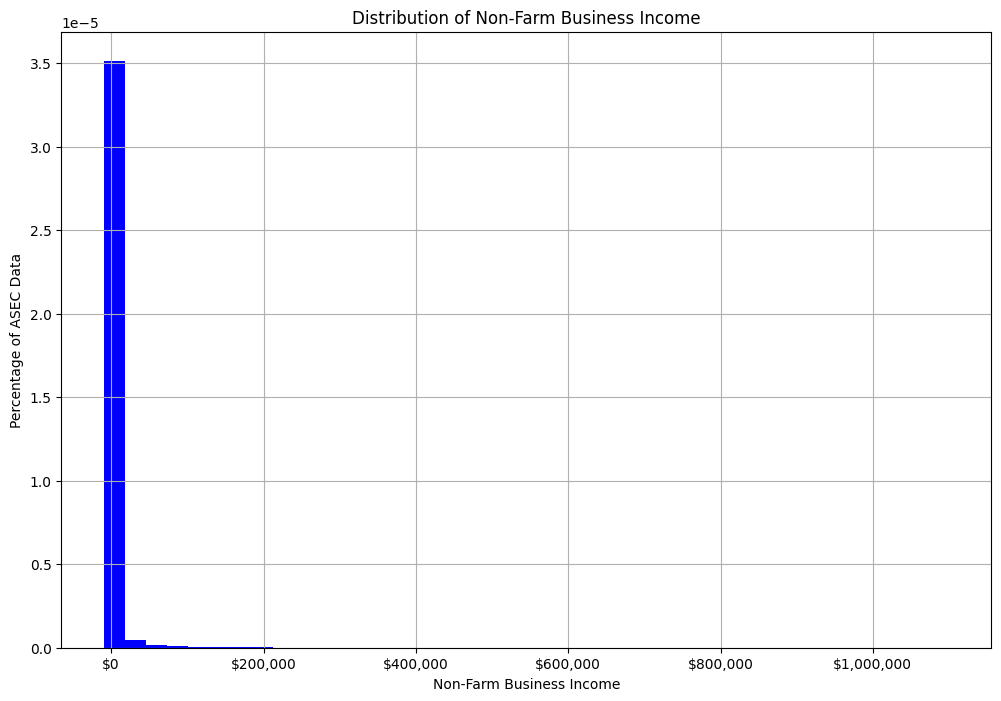

count     121119
unique       111
top            0
freq      120002
Name: INCFARM_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


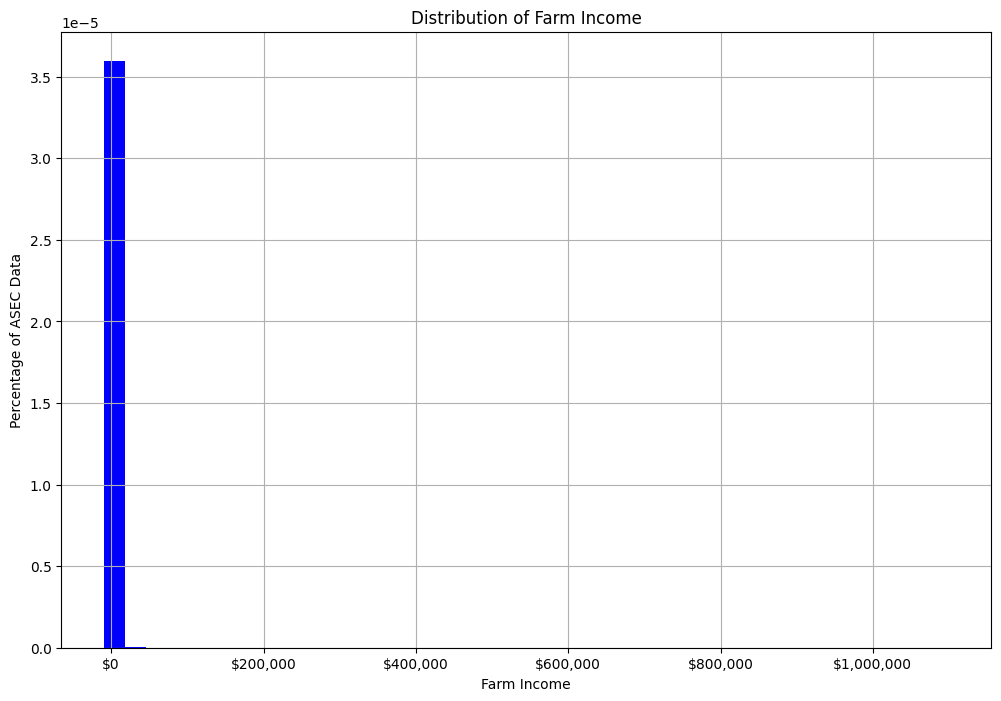

count     121119
unique      4013
top            0
freq       96494
Name: INCSS_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


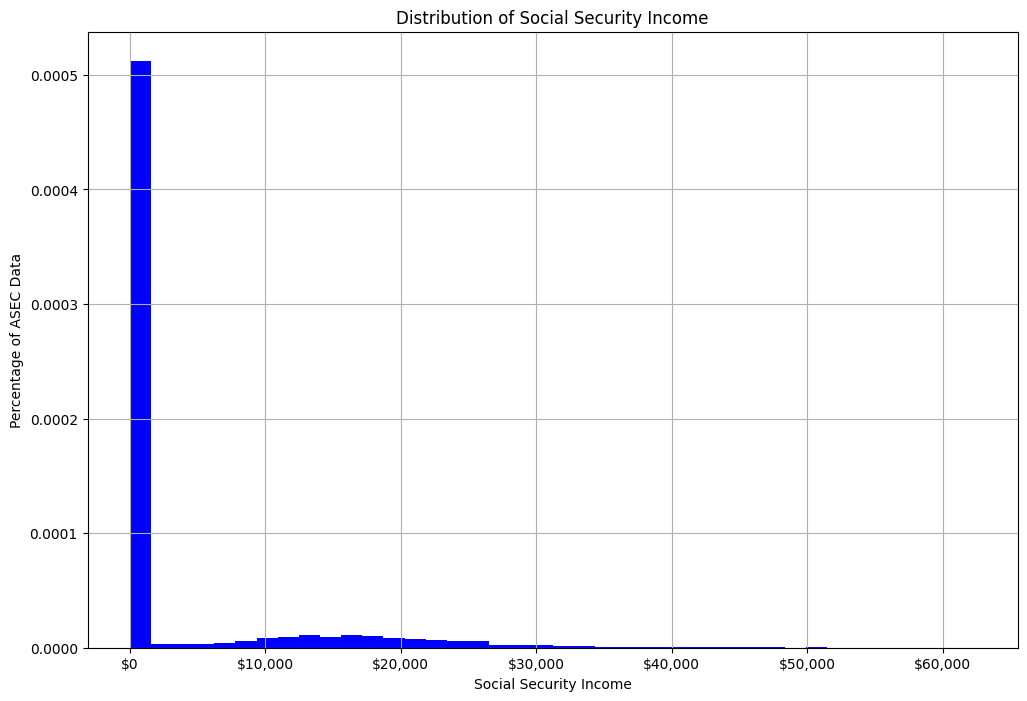

count     121119
unique       224
top            0
freq      120364
Name: INCWELFR_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


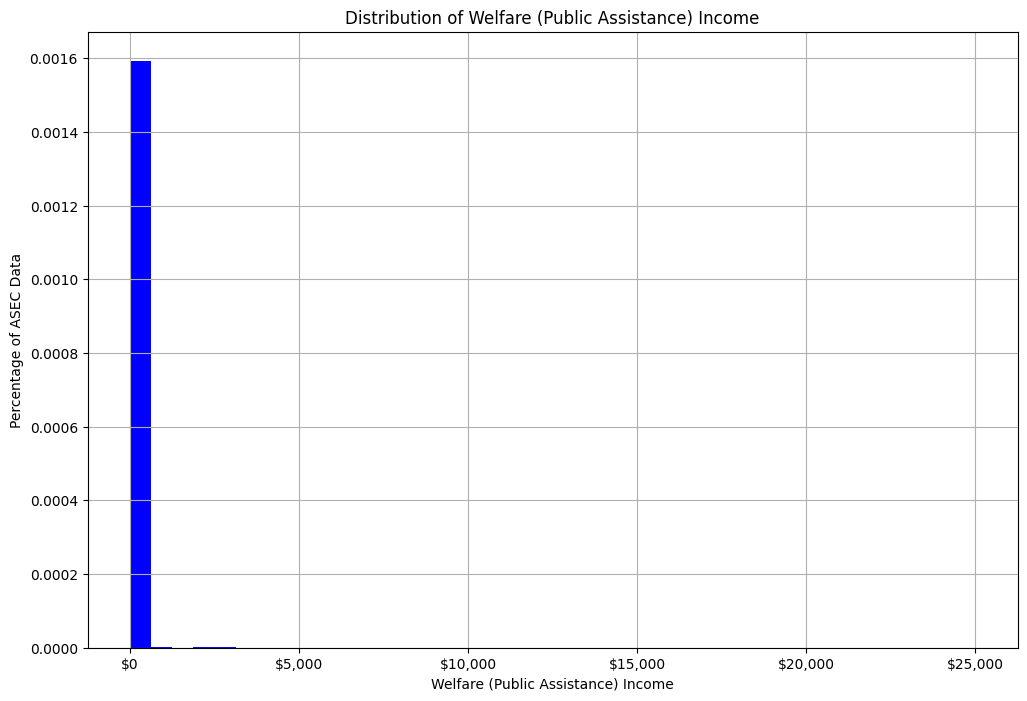

count     152732
unique       695
top            0
freq      148239
Name: INCRETIR_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


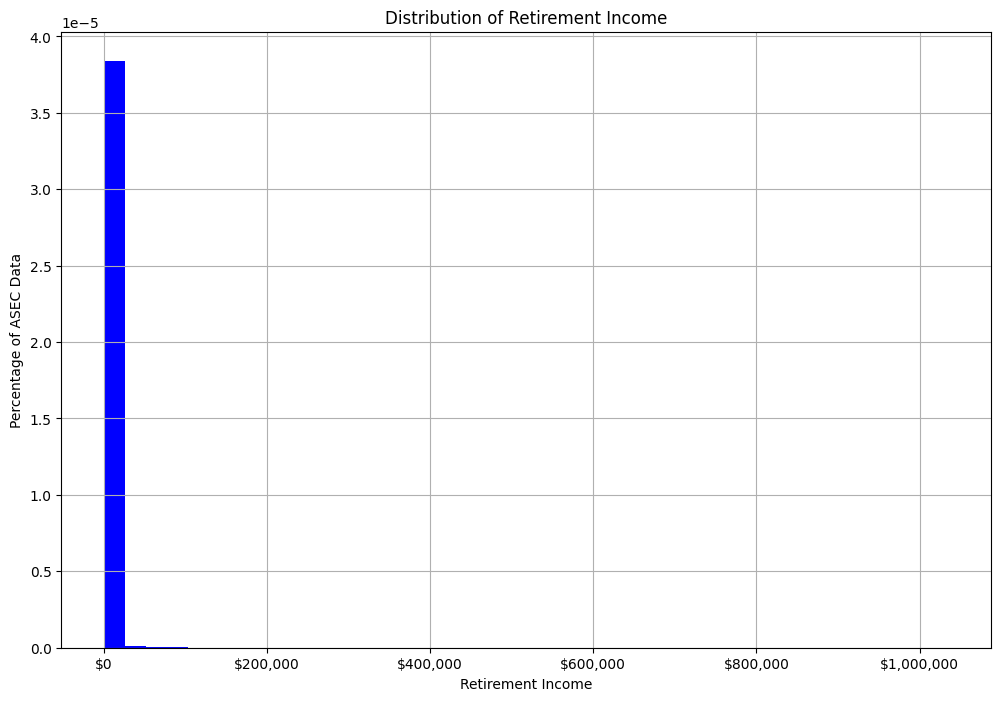

count     121119
unique       583
top            0
freq      118450
Name: INCSSI_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


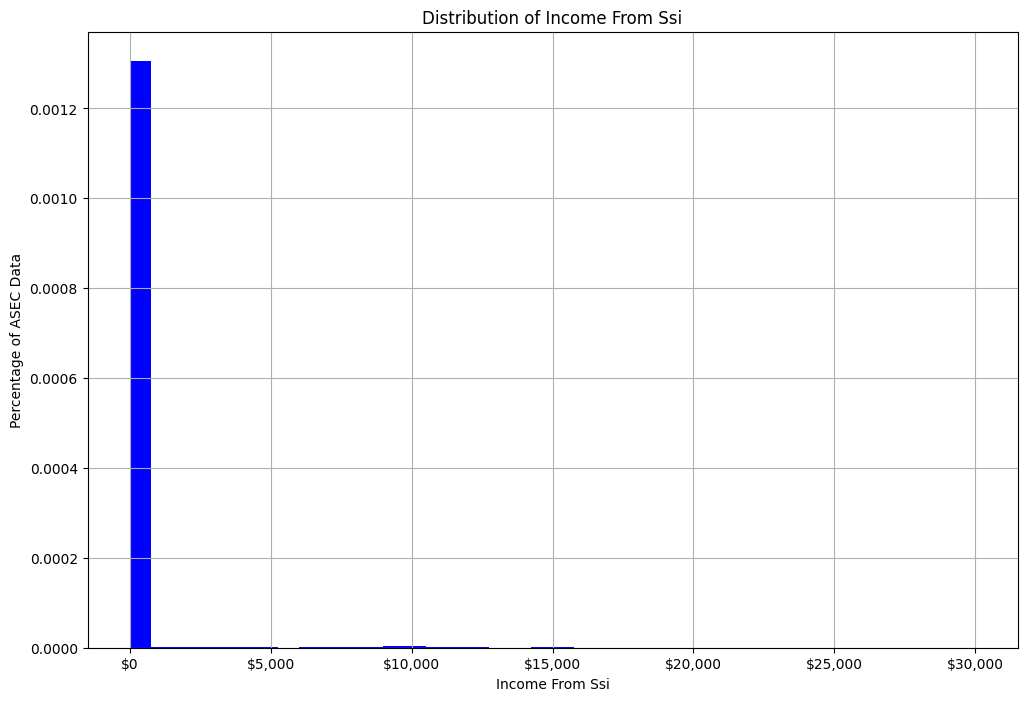

count     121119
unique      6135
top            0
freq       54668
Name: INCINT_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


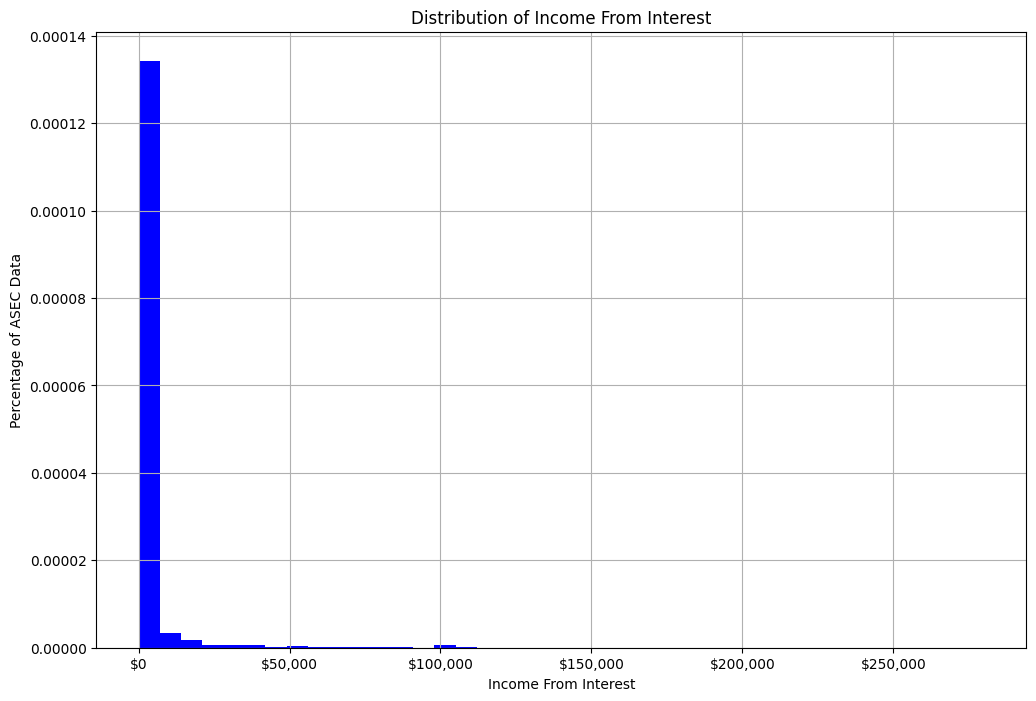

count     121119
unique       941
top            0
freq      117054
Name: INCUNEMP_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


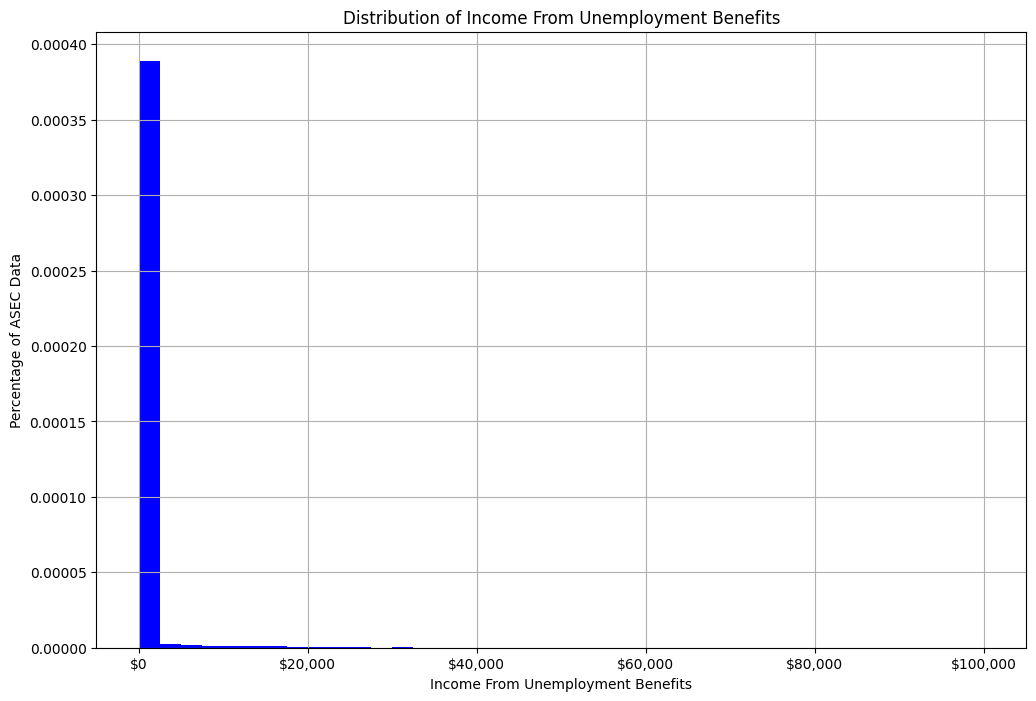

count     121119
unique       152
top            0
freq      120695
Name: INCWKCOM_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


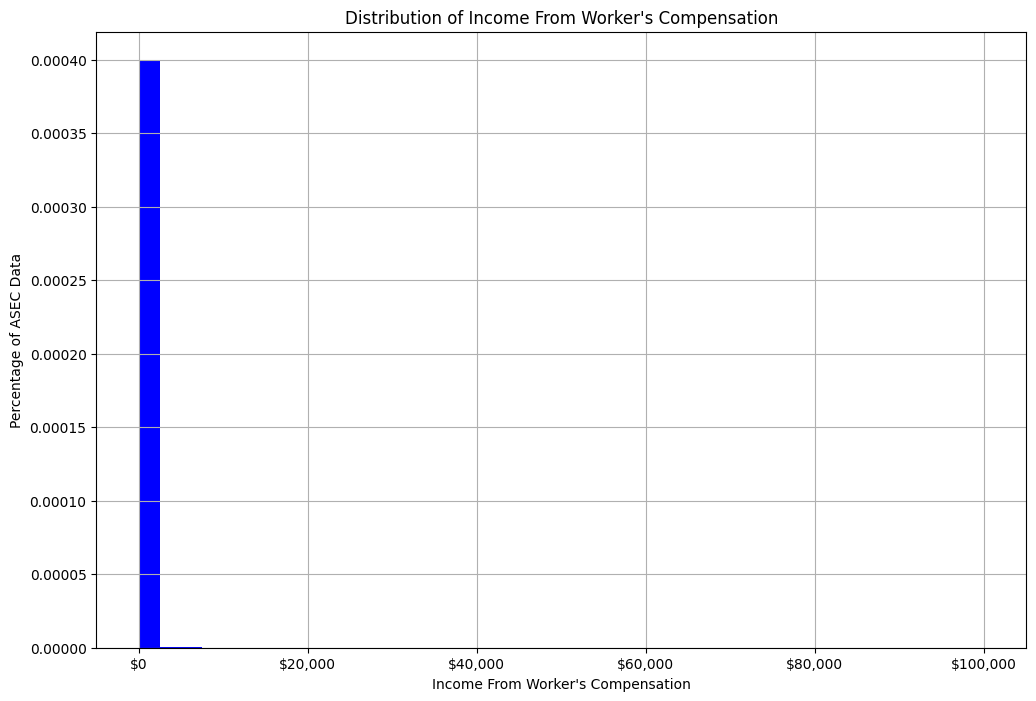

count     121119
unique       482
top            0
freq      118952
Name: INCVET_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


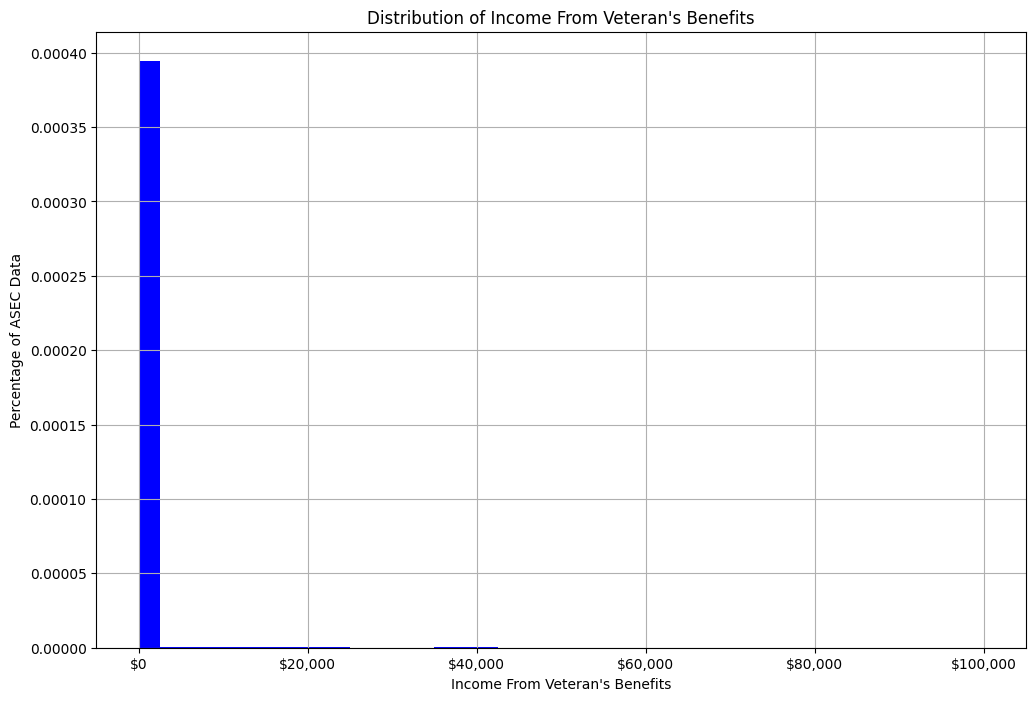

count     121119
unique       391
top            0
freq      119762
Name: INCSURV_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


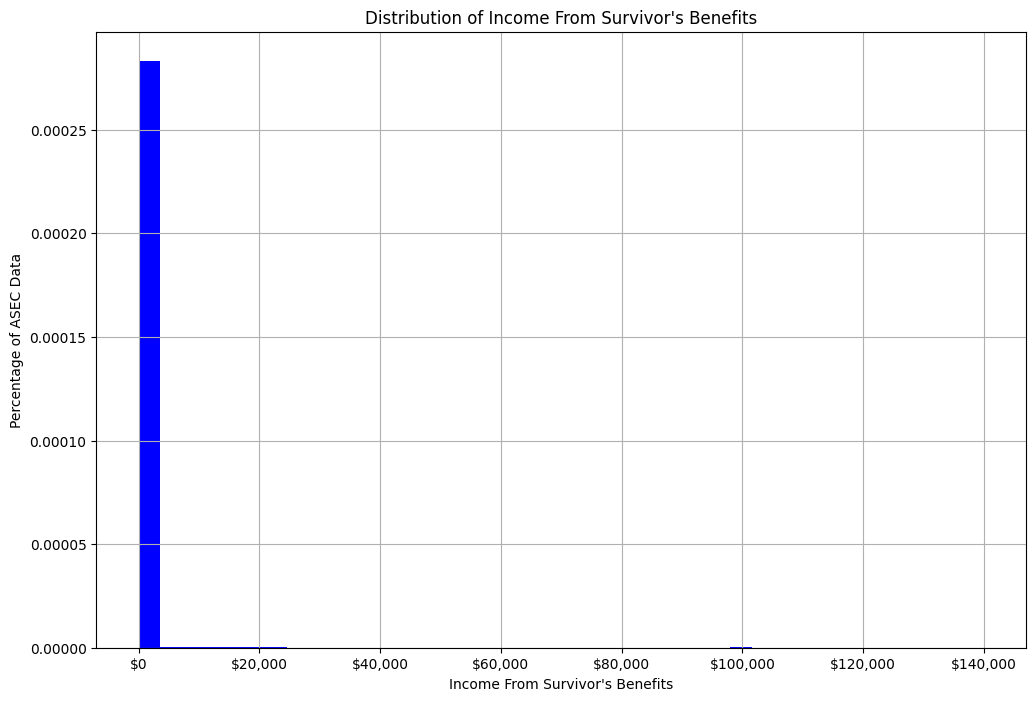

count     121119
unique       315
top            0
freq      119956
Name: INCDISAB_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


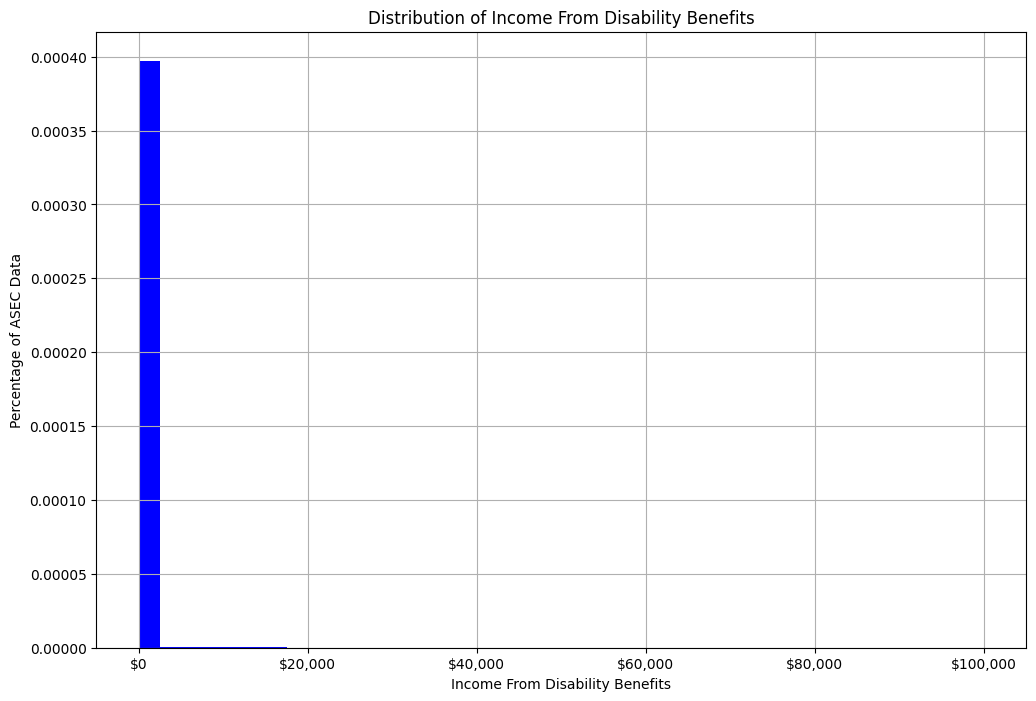

count     121119
unique       480
top            0
freq      104418
Name: INCDIVID_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


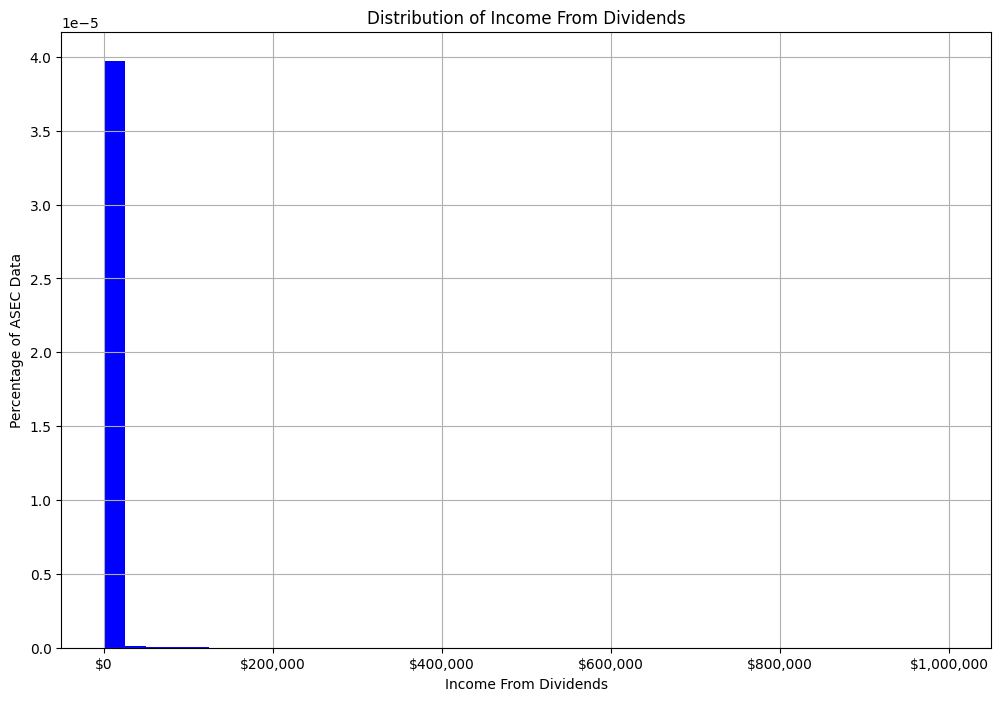

count     121119
unique       377
top            0
freq      115548
Name: INCRENT_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


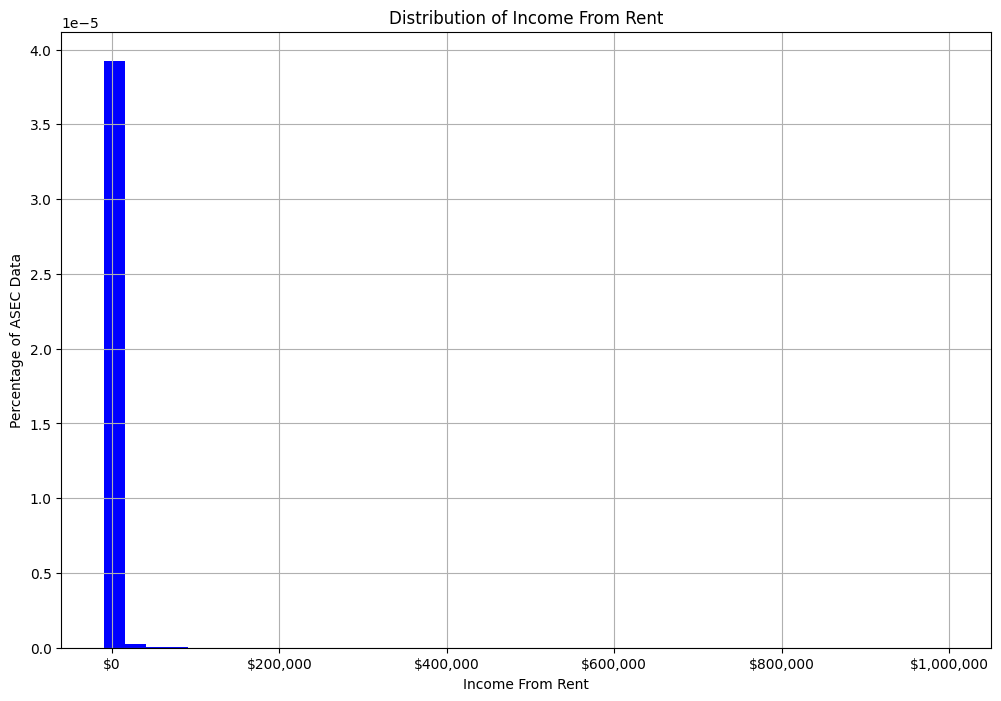

count     121119
unique       278
top            0
freq      118069
Name: INCEDUC_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


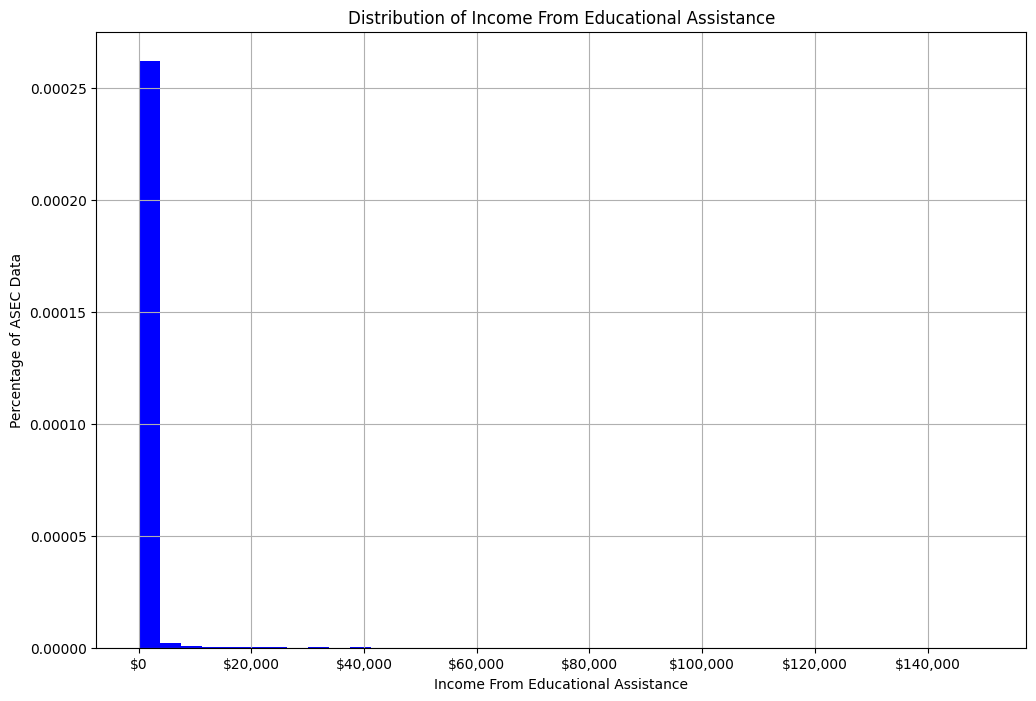

count     121119
unique       447
top            0
freq      119308
Name: INCCHILD_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


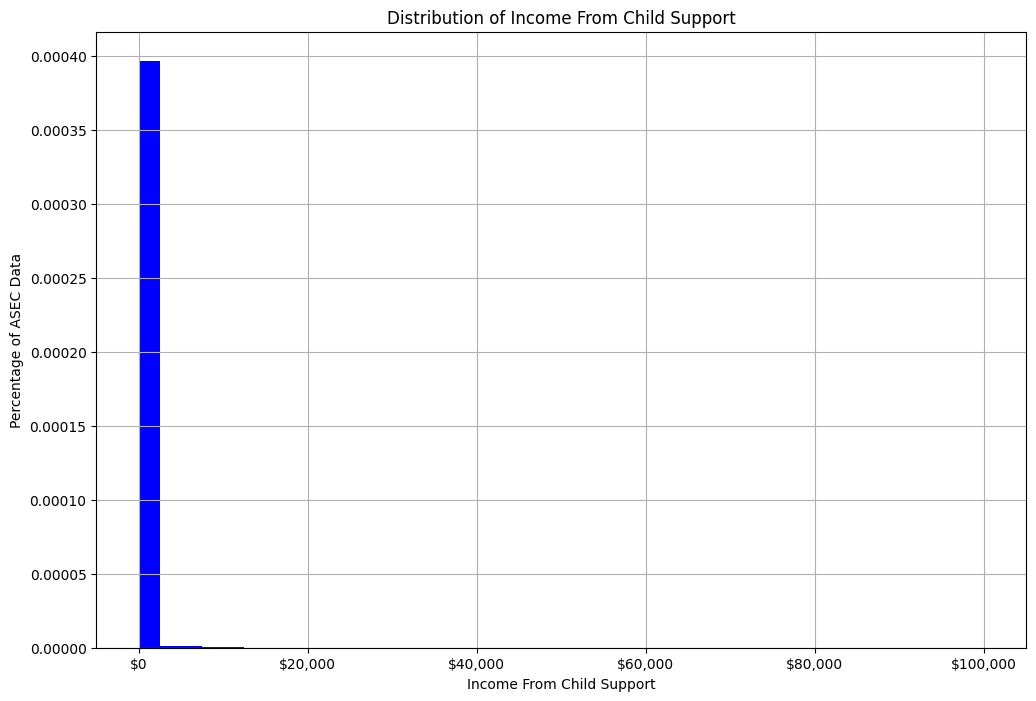

count     121119
unique       133
top            0
freq      120073
Name: INCASIST_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


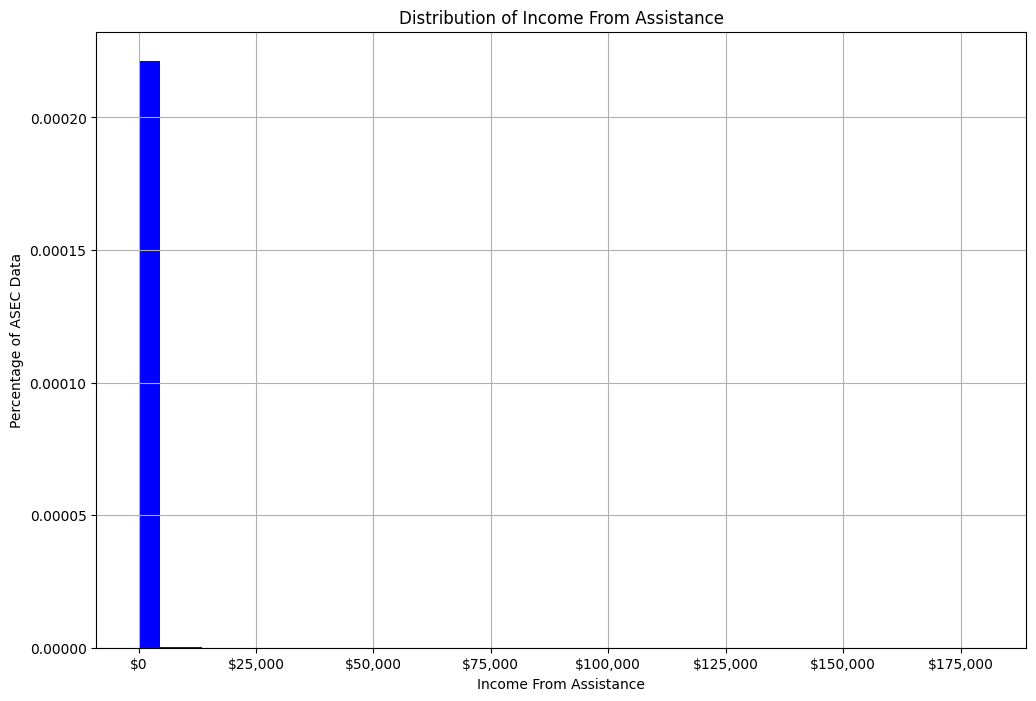

count     152732
unique       212
top            0
freq      151486
Name: INCOTHER_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


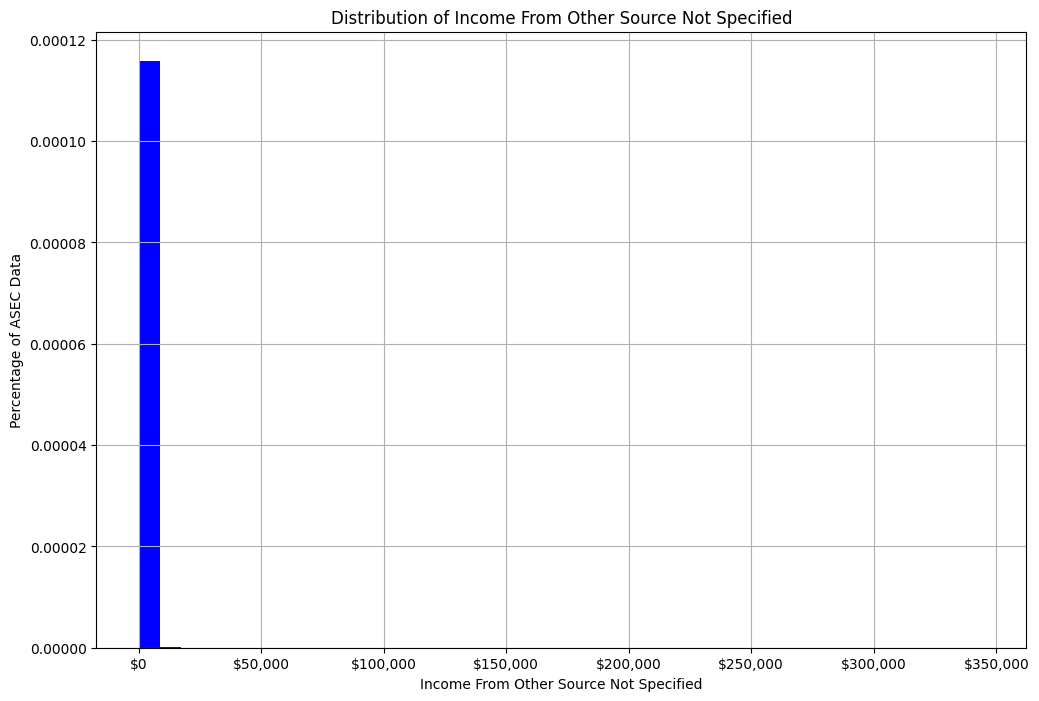

count     152730
unique       349
top            0
freq      150982
Name: INCRANN_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


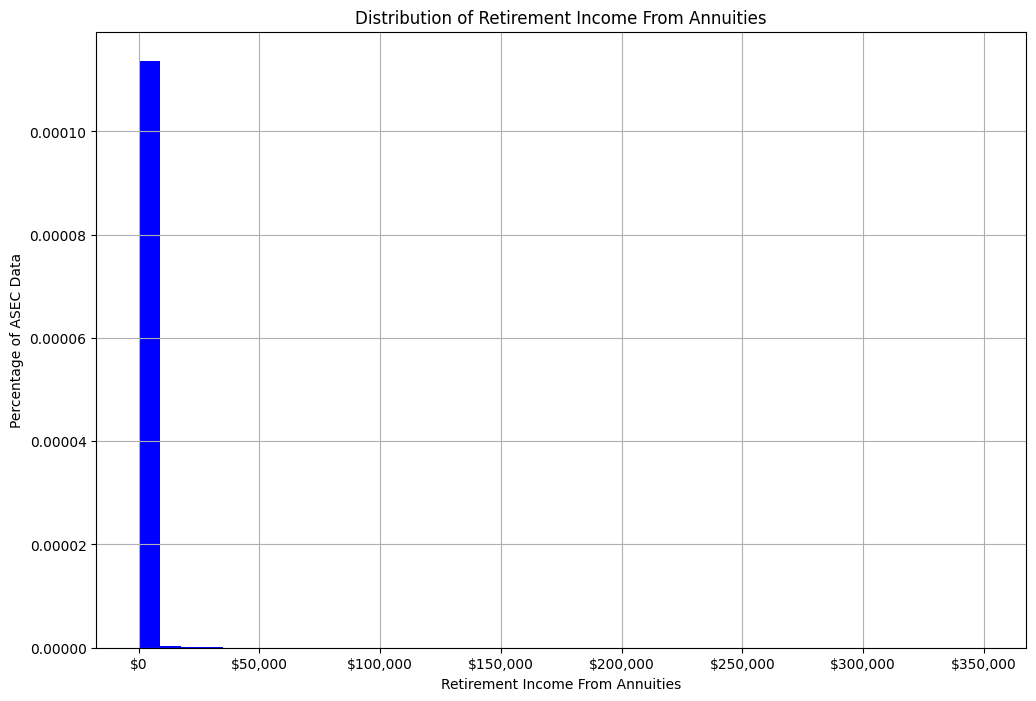

count     152727
unique      1508
top            0
freq      145149
Name: INCPENS_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


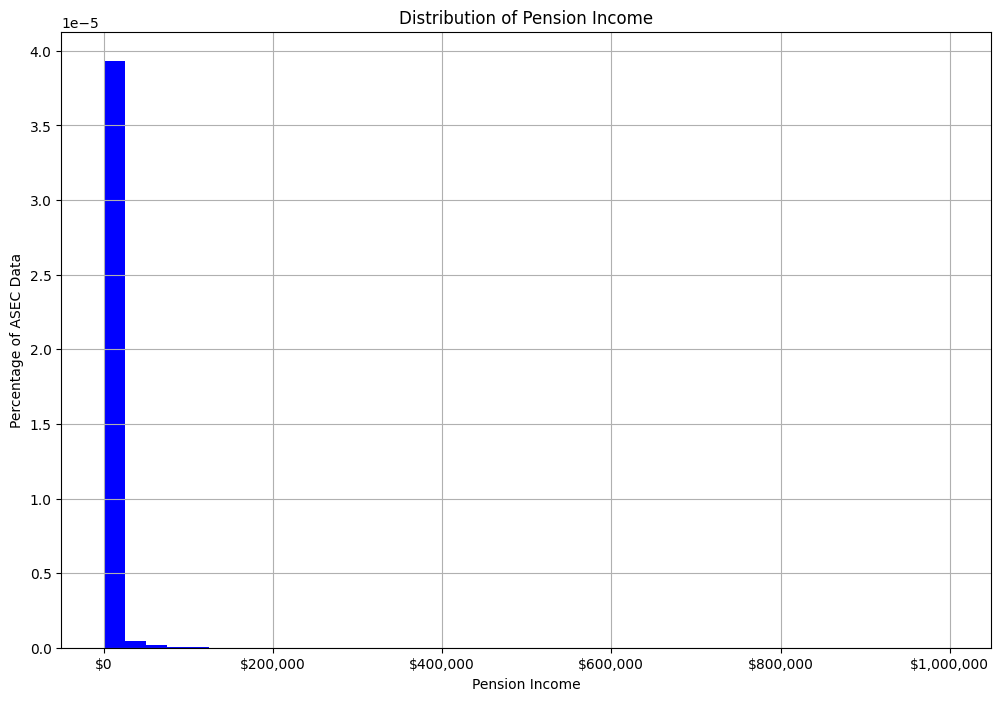

count     121119
unique     33021
top            0
freq       50201
Name: ADJGINC_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


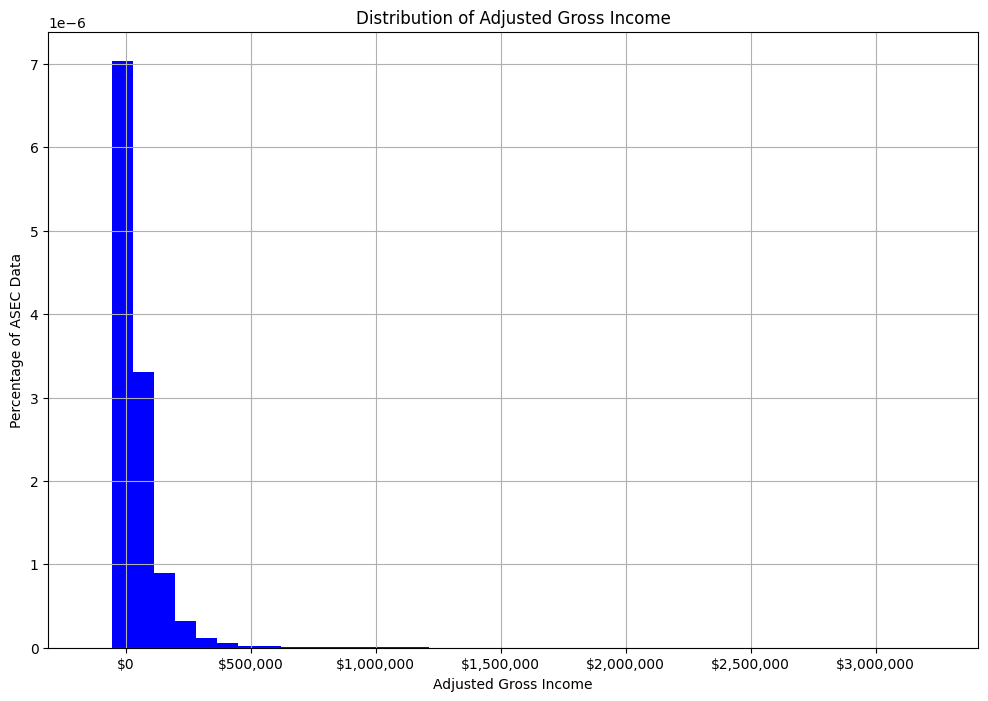

count     121119
unique     31994
top            0
freq       65094
Name: TAXINC_2, dtype: int64


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/3936798343.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])


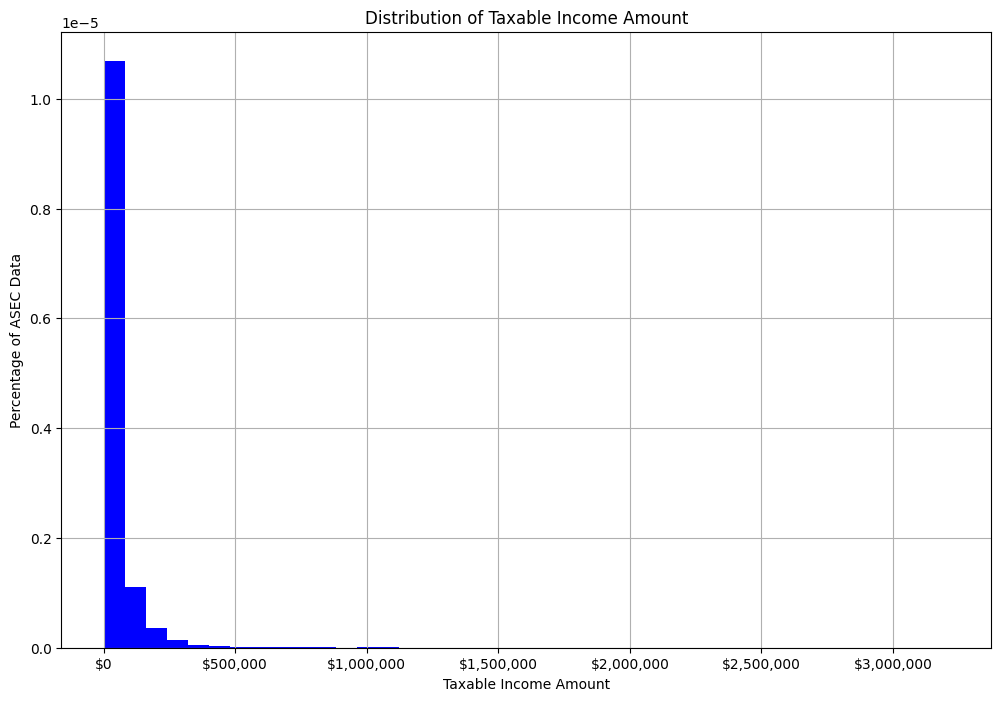

In [31]:
for col in df.columns:
    if 'INC' in col and '2' not in col:
        colname = f"{col}_2"
        f = df[colname].isnull()==False
        print(df.loc[f, colname].describe().round(0))
        ax = df.loc[f, colname].hist(weights=df.loc[f, 'ASECWT'], figsize=(12, 8), color='blue', bins=40, density=True)
        label = ddi_codebook.get_variable_info(col).label.title().replace("'S", "'s")
        ax.set_title(f"Distribution of {label}")
        ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
        ax.set_xlabel(f"{label}")
        ax.set_ylabel(f"Percentage of ASEC Data")
        plt.show()

In [32]:
! pip install seaborn

You should consider upgrading via the '/Users/franciscojavierarceo/.pyenv/versions/3.8.16/bin/python3.8 -m pip install --upgrade pip' command.


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")

In [34]:
def map_codes(ddi, xdf, xvar):
    g = {v:k for k,v in ddi.get_variable_info(xvar).codes.items()}
    res = xdf[xvar].apply(lambda x: g.get(x, None))
    return res

In [35]:
import matplotlib as mpl

In [36]:
def cdf_plot_by_x(
    xdf,
    groupbyvar,
    xvar,
    wvar,
    k=None,
    bbox=(0.5, -0.1),
    legend_ncol=3,
    max_percentile=1.,
):
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    if k is not None:
        sdf = xdf[groupbyvar].value_counts()
        top_k = sdf[0:(k-1)].index.tolist()
        xdfss = xdf[xdf.eval(f'{groupbyvar} == "' + f'" | {groupbyvar} == "'.join(top_k) + '"')].reset_index(drop=True)
        print(f'reducing records from {xdf.shape[0]} to {xdfss.shape[0]}')
        print(f"reducing groups from {xdf[groupbyvar].nunique()} to {k}")
    else:
        xdfss = xdf
    
    max_percentile_value = xdfss[xvar].quantile(max_percentile)
    xdfss = xdfss[xdfss[xvar] < max_percentile_value]
    groups = xdfss[groupbyvar].unique()
    pal = sns.color_palette("bright", len(groups))
    sns.ecdfplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        alpha=0.8, 
        ax=ax,
        palette=pal,
    ).set(title=f'Cumulative Distribution of Total Income by {groupbyvar}')
    label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    ax.set_xlabel(f"{label}")
    ax.set_ylabel(f"Cumulative Percent of ASEC Data")
    ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax.get_legend().set_visible(False)

    fig.legend(labels=groups, loc='lower center', bbox_to_anchor=bbox, ncol=legend_ncol)
    fig.show()
    
def den_plot_by_x(
    xdf,
    groupbyvar,
    xvar,
    wvar,
    k=None,
    bbox=(0.5, -0.1),
    legend_ncol=3,
    max_percentile=1.,
):
    fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
    if k is not None:
        sdf = xdf[groupbyvar].value_counts()
        top_k = sdf[0:(k-1)].index.tolist()
        xdfss = xdf[xdf.eval(f'{groupbyvar} == "' + f'" | {groupbyvar} == "'.join(top_k) + '"')].reset_index(drop=True)
        print(f'reducing records from {xdf.shape[0]} to {xdfss.shape[0]}')
        print(f"reducing groups from {xdf[groupbyvar].nunique()} to {k}")
    else:
        xdfss = xdf
    
    max_percentile_value = xdfss[xvar].quantile(max_percentile)
    xdfss = xdfss[xdfss[xvar] < max_percentile_value]
    groups = xdfss[groupbyvar].unique()
    pal = sns.color_palette("bright", len(groups))

    sns.kdeplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        cut=0, fill=True, 
        common_norm=False, 
        alpha=0.2, 
        ax=ax1,
        palette=pal,
    ).set(title=f'Estimated Density Function of Total Income by {groupbyvar}')
    label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    ax1.set_xlabel(f"{label}")
    ax1.set_ylabel(f"Percent of ASEC Data")
    ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    ax1.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax1.get_legend().set_visible(False)
    fig.legend(labels=groups, loc='lower center', bbox_to_anchor=bbox, ncol=legend_ncol)
    fig.show()

def den_cdf_plot_by_x(
    xdf,
    groupbyvar,
    xvar,
    wvar,
    k=None,
    bbox=(0.5, -0.1),
    legend_ncol=3,
    max_percentile=1.,
):
    fig, (ax1, ax) = plt.subplots(1, 2, figsize=(16, 8))
    if k is not None:
        sdf = xdf[groupbyvar].value_counts()
        top_k = sdf[0:(k-1)].index.tolist()
        xdfss = xdf[xdf.eval(f'{groupbyvar} == "' + f'" | {groupbyvar} == "'.join(top_k) + '"')].reset_index(drop=True)
        print(f'reducing records from {xdf.shape[0]} to {xdfss.shape[0]}')
        print(f"reducing groups from {xdf[groupbyvar].nunique()} to {k}")
    else:
        xdfss = xdf
    
    max_percentile_value = xdfss[xvar].quantile(max_percentile)
    xdfss = xdfss[xdfss[xvar] < max_percentile_value]
    groups = xdfss[groupbyvar].unique()
    pal = sns.color_palette("bright", len(groups))

    sns.kdeplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        cut=0, fill=True, 
        common_norm=False, 
        alpha=0.2, 
        ax=ax1,
        palette=pal,
    ).set(title=f'Estimated Density Function of Total Income by {groupbyvar}')
    label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    ax1.set_xlabel(f"{label}")
    ax1.set_ylabel(f"Percent of ASEC Data")
    ax1.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    ax1.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax1.get_legend().set_visible(False)

    sns.ecdfplot(
        data=xdfss,
        weights=wvar, 
        x=xvar, 
        hue=groupbyvar, 
        alpha=0.8, 
        ax=ax,
        palette=pal,
    ).set(title=f'Cumulative Distribution of Total Income by {groupbyvar}')
    label = ddi_codebook.get_variable_info(xvar.replace("_2", "")).label.title().replace("'S", "'s")
    ax.set_xlabel(f"{label}")
    ax.set_ylabel(f"Cumulative Percent of ASEC Data")
    ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.2f}'))
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
    ax.get_legend().set_visible(False)

    fig.legend(labels=groups, loc='lower center', bbox_to_anchor=bbox, ncol=legend_ncol)
    fig.show()

In [37]:
EDUC_LT_HS = 'Less than High School Diploma'
EDUC_HS = 'High school diploma or equivalent'
EDUC_VOC = 'Vocational Degree'
EDUC_BS = "Bachelor's degree"
EDUC_GRAD = "Graduate degree"
educ_attain = {
    'NIU or blank': 'Missing',
    'Grades 1, 2, 3, or 4': EDUC_LT_HS,
    'Grades 5 or 6': EDUC_LT_HS,
    'Grades 7 or 8': EDUC_LT_HS,
    'Grade 9': EDUC_LT_HS,
    'Grade 10': EDUC_LT_HS,
    'Grade 11': EDUC_LT_HS,
    '12th grade, no diploma': EDUC_LT_HS,
    'None or preschool': EDUC_LT_HS,
    'High school diploma or equivalent': EDUC_HS,
    "Associate's degree, academic program": EDUC_HS,
    "Associate's degree, occupational/vocational program": EDUC_VOC,
    'Some college but no degree': EDUC_HS,
    "Bachelor's degree": EDUC_BS,
    "Master's degree": EDUC_GRAD,
    'Doctorate degree': EDUC_GRAD,
    'Professional school degree': EDUC_GRAD,
}

In [38]:
df['Education'] = map_codes(ddi_codebook, df, 'EDUC')
df['Educational_Attainment'] = df['Education'].apply(lambda x: educ_attain.get(x)).astype(str)
df['Birthplace'] = map_codes(ddi_codebook, df, 'BPL')
df['Marital_Status'] = map_codes(ddi_codebook, df, 'MARST')
df['Nativity'] = map_codes(ddi_codebook, df, 'NATIVITY')
df['Class_of_worker'] = map_codes(ddi_codebook, df, 'CLASSWKR')
df['Hispanic'] = map_codes(ddi_codebook, df, 'HISPAN')
df['Asian'] = map_codes(ddi_codebook, df, 'ASIAN')
df['Race'] = map_codes(ddi_codebook, df, 'RACE')
df['Veteran_Status'] = map_codes(ddi_codebook, df, 'VETSTAT')
df['Age_bucket'] = "Age " + pd.qcut(df['AGE'], q=5).astype(str)

In [39]:
df['income_null'] = df['INCTOT_2'].isnull()

In [40]:
df['Educational_Attainment'].value_counts(True)

High school diploma or equivalent    0.384693
Missing                              0.206983
Bachelor's degree                    0.160006
Less than High School Diploma        0.120983
Graduate degree                      0.095232
Vocational Degree                    0.032102
Name: Educational_Attainment, dtype: float64

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


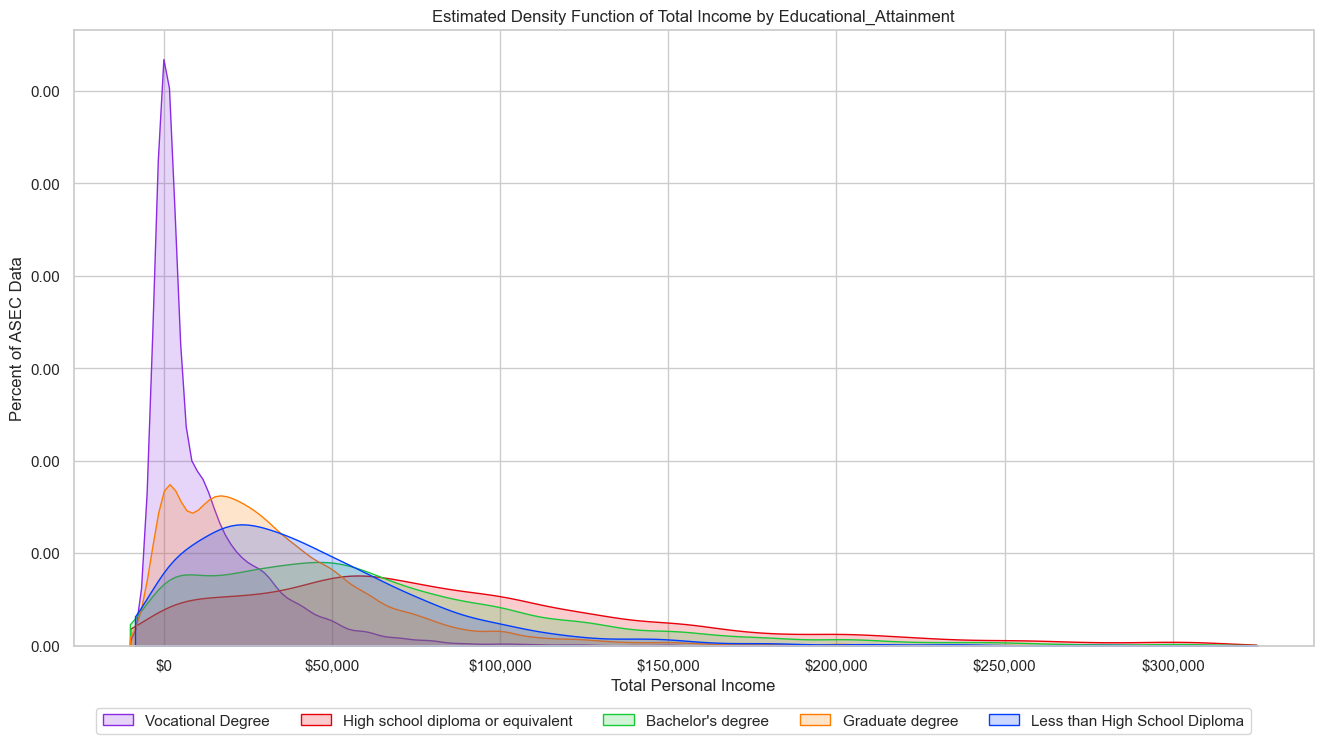

In [41]:
den_plot_by_x(df, 'Educational_Attainment', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.01), legend_ncol=10, max_percentile=0.99)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


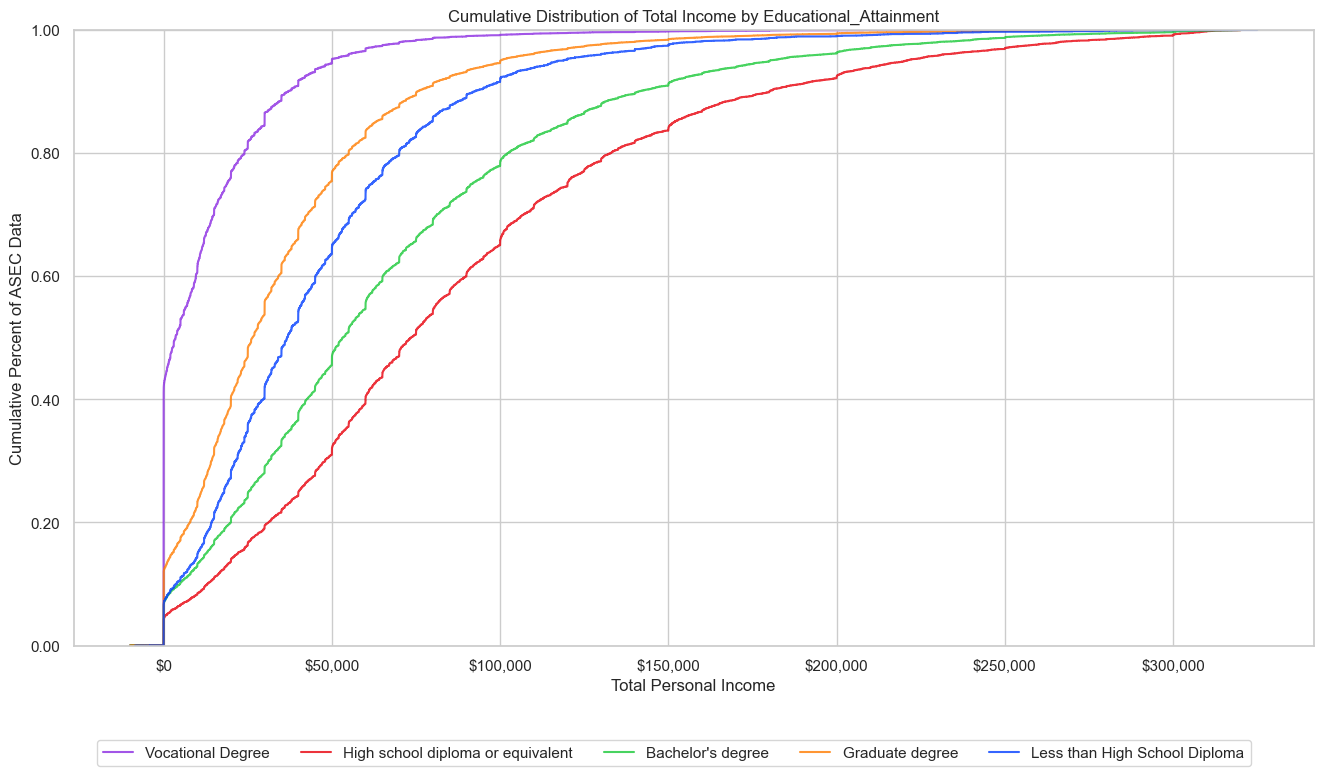

In [42]:
cdf_plot_by_x(df, 'Educational_Attainment', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.05), legend_ncol=10, max_percentile=0.99)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


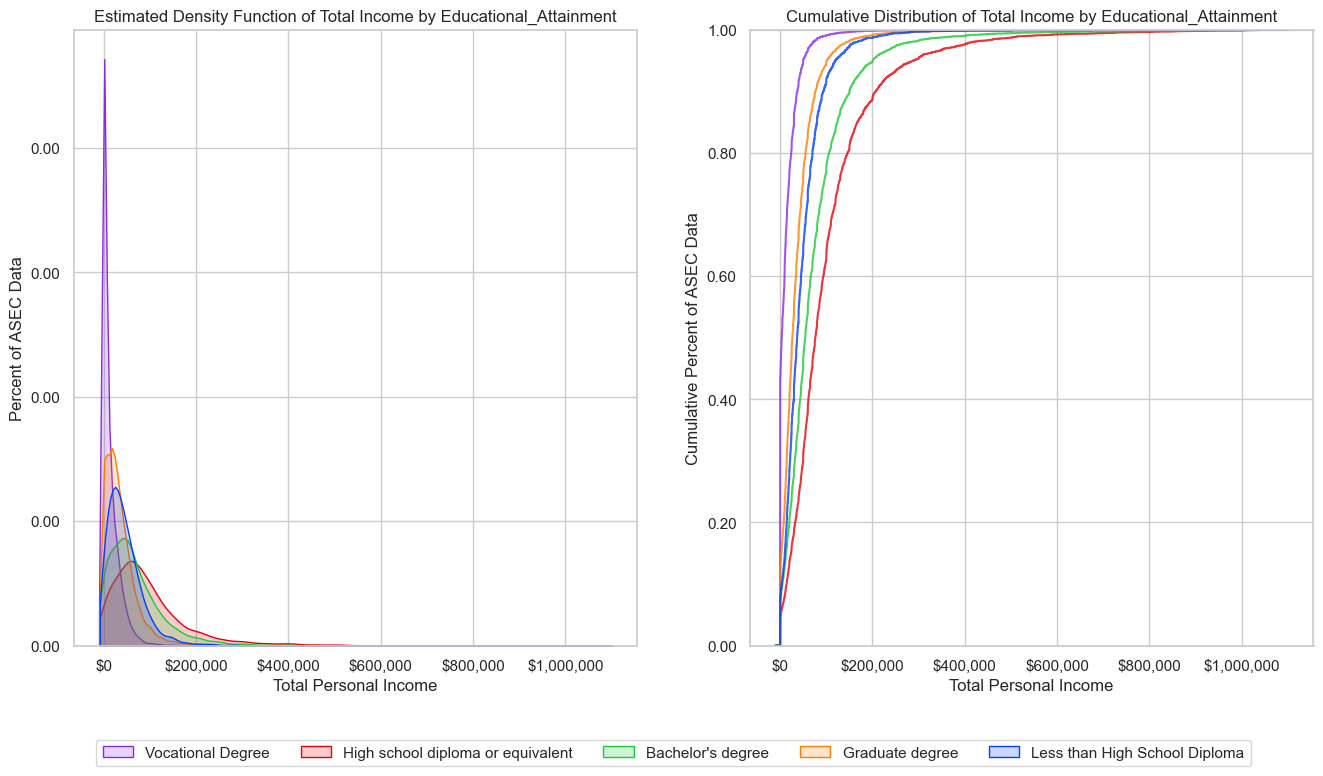

In [43]:
den_cdf_plot_by_x(df, 'Educational_Attainment', 'INCTOT_2', 'ASECWT', 
                  k=None, bbox=(0.5, -0.05), legend_ncol=10, max_percentile=0.999)

/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


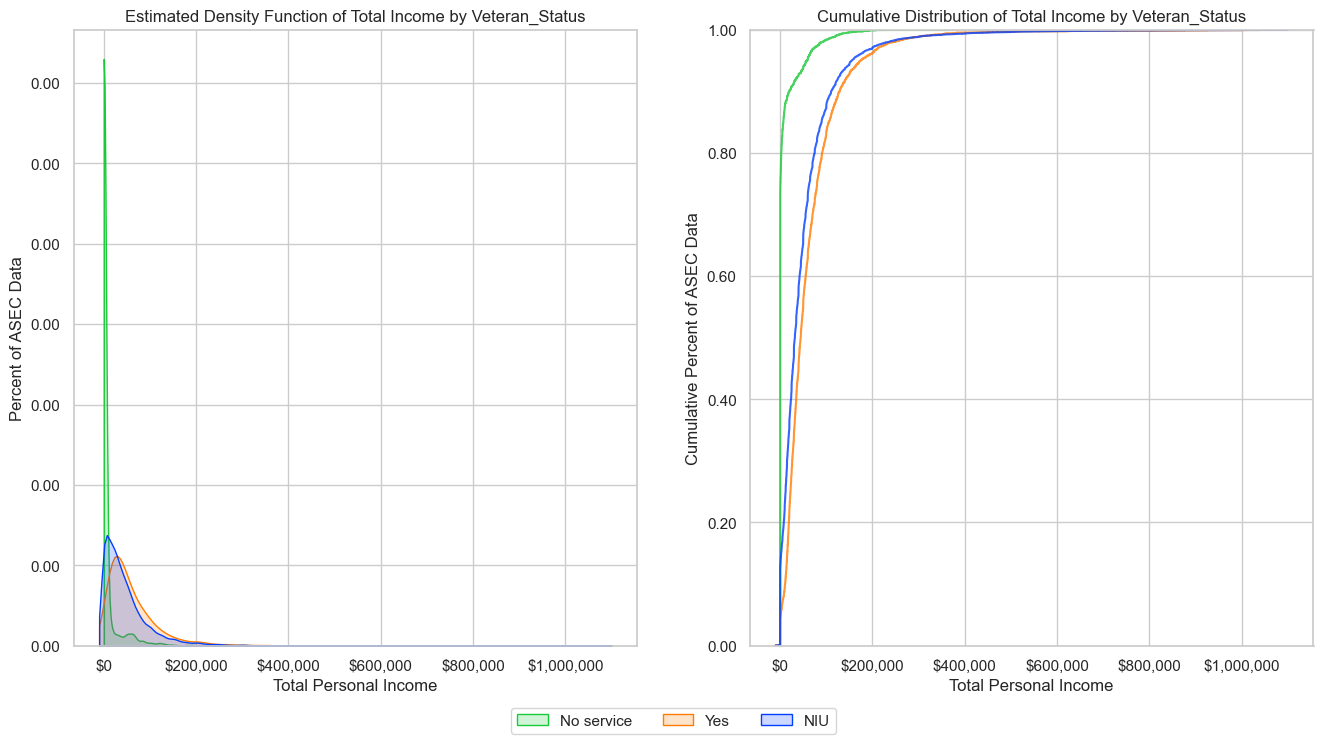

In [44]:
den_cdf_plot_by_x(
    df, 'Veteran_Status', 'INCTOT_2', 'ASECWT', 
    k=None, bbox=(0.5, -0.01), legend_ncol=5, 
    max_percentile=0.999,
)

reducing records from 152732 to 150532
reducing groups from 8 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


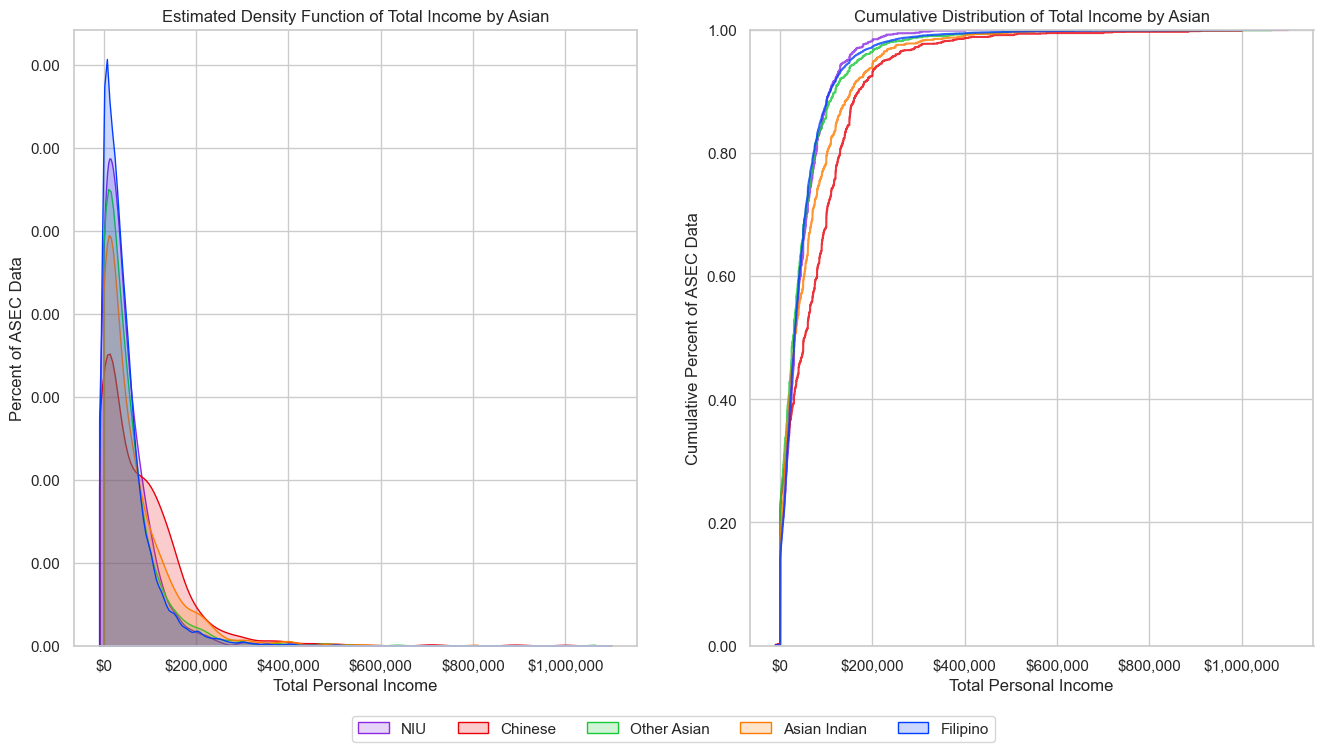

In [45]:
den_cdf_plot_by_x(
    df, 'Asian', 'INCTOT_2', 'ASECWT', k=6, 
    bbox=(0.5, -0.02), legend_ncol=10, max_percentile=0.999,
)

reducing records from 152732 to 147808
reducing groups from 9 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


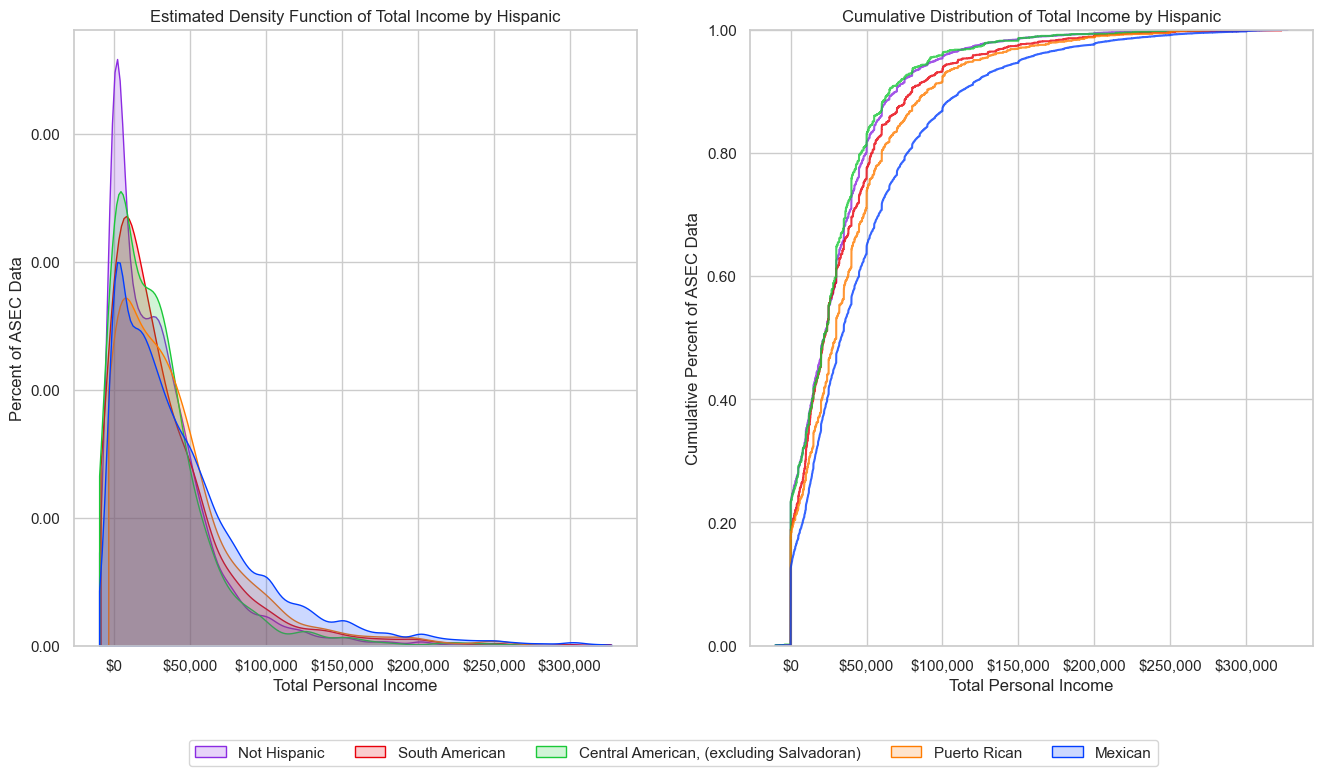

In [46]:
den_cdf_plot_by_x(
    df, 'Hispanic', 'INCTOT_2', 'ASECWT', 
    k=6, bbox=(0.5, -0.05), legend_ncol=5, 
    max_percentile=0.99,
)

reducing records from 152732 to 147124
reducing groups from 9 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


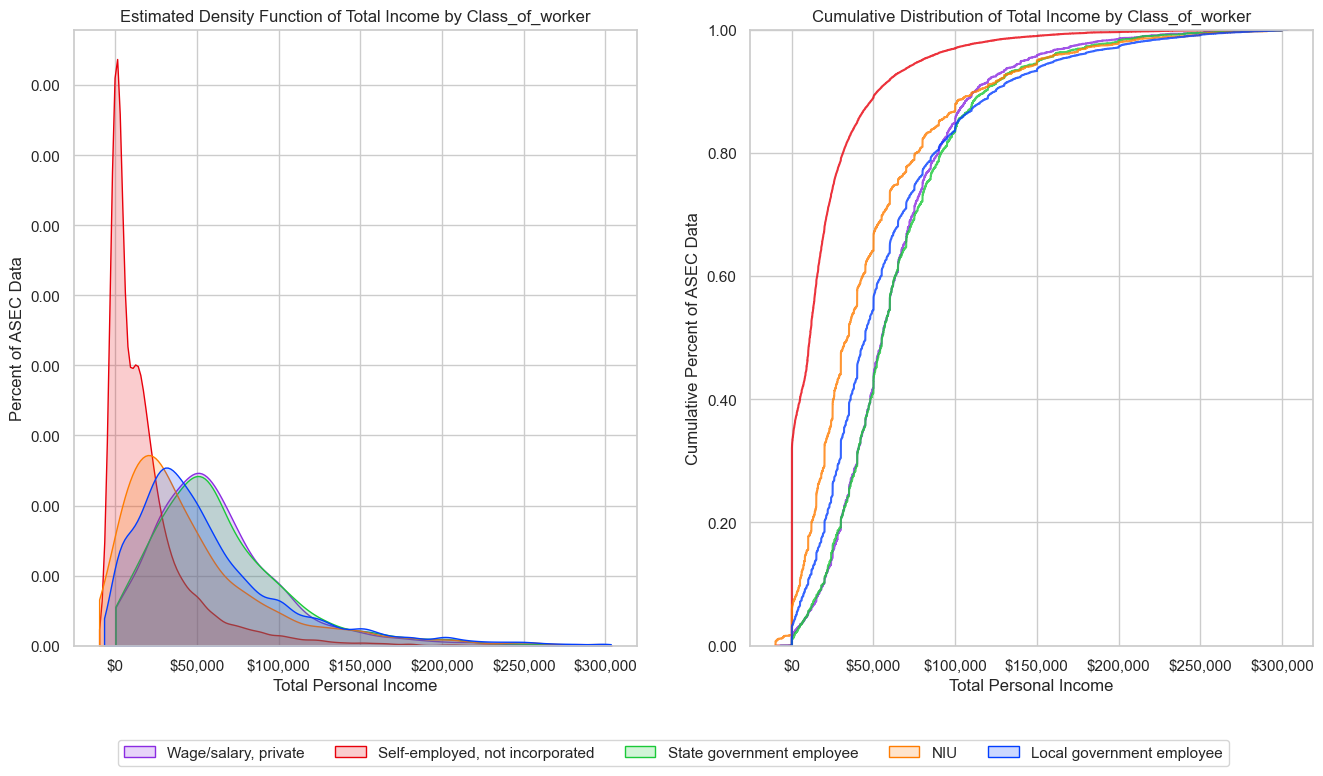

In [47]:
den_cdf_plot_by_x(df, 'Class_of_worker', 'INCTOT_2', 'ASECWT', k=6, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 152732 to 151031
reducing groups from 6 to 6


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


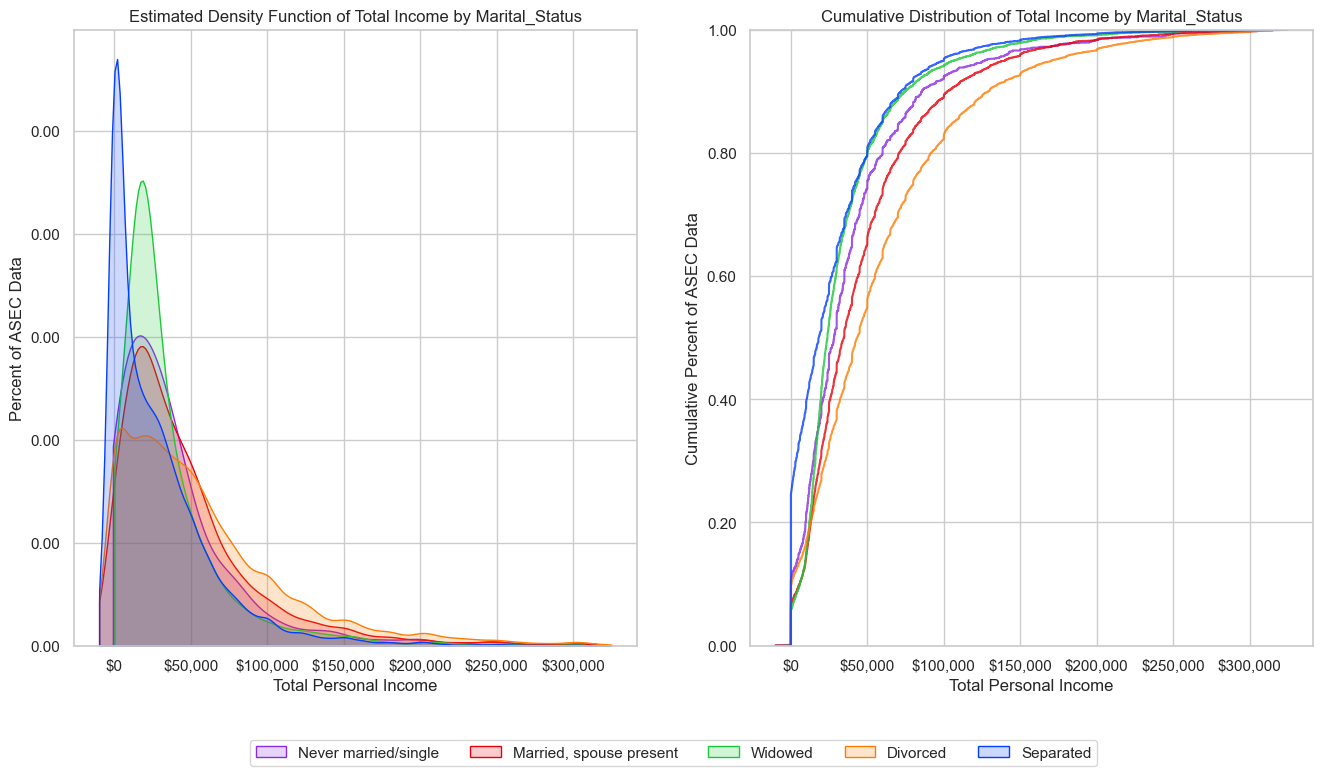

In [48]:
den_cdf_plot_by_x(
    df, 'Marital_Status', 'INCTOT_2', 'ASECWT', k=6, bbox=(0.5, -0.05), 
    legend_ncol=5, max_percentile=0.99
)

In [49]:
df['Age'] = df['AGE'].astype(float)

reducing records from 152732 to 141866
reducing groups from 161 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


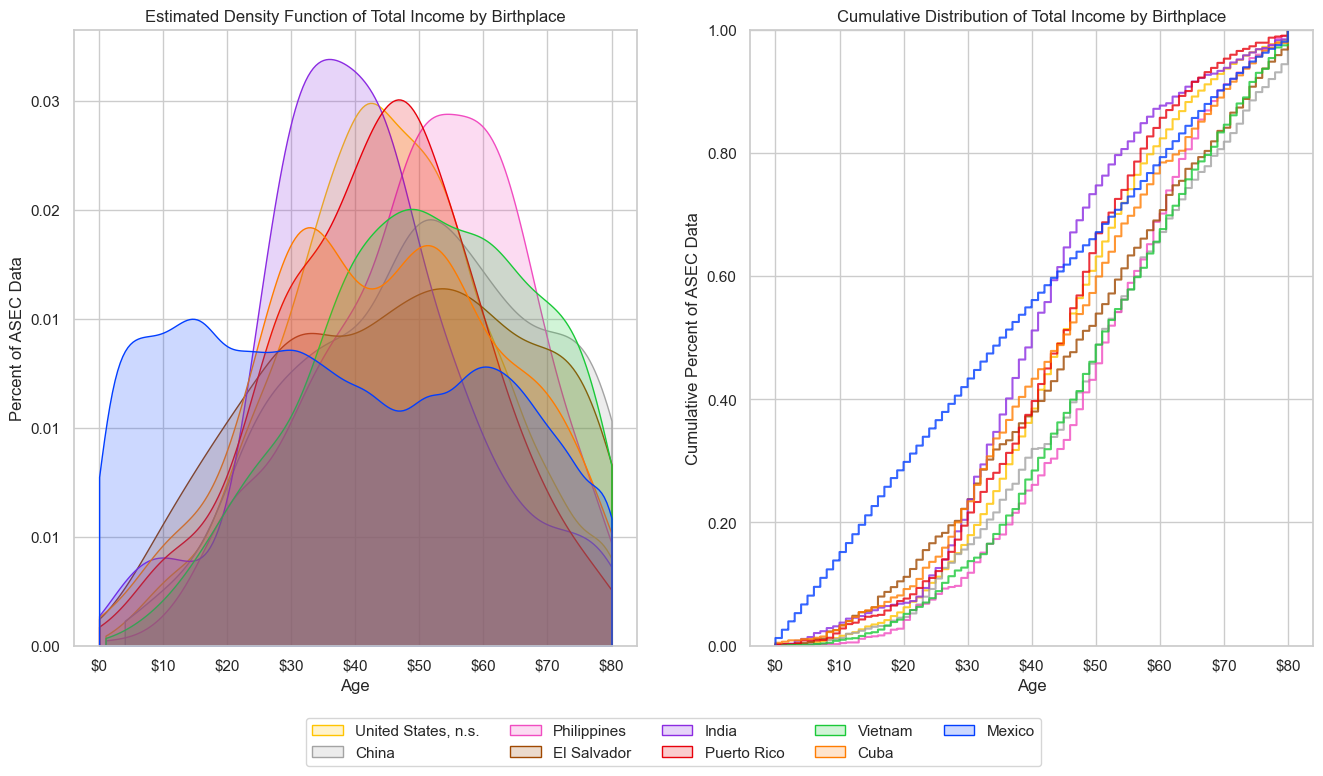

In [50]:
den_cdf_plot_by_x(df, 'Birthplace', 'Age', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 152732 to 141866
reducing groups from 161 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


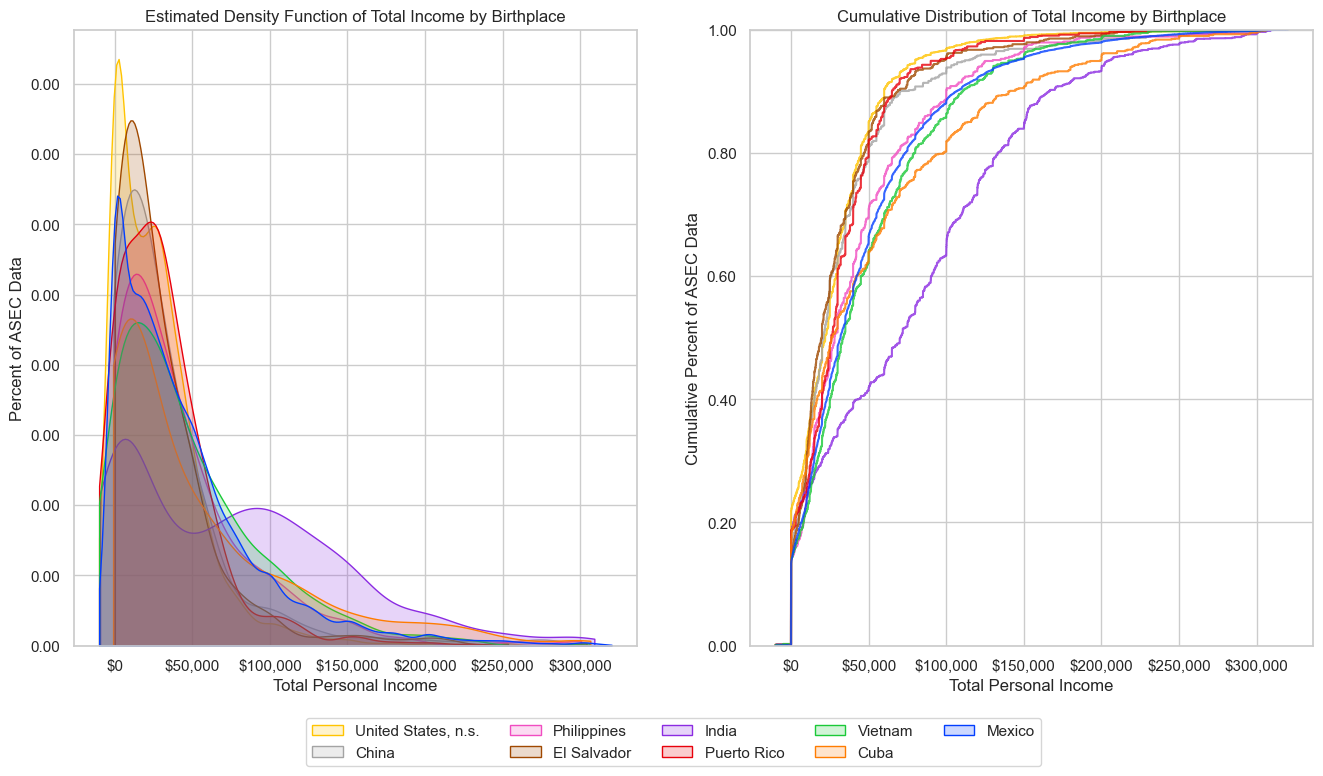

In [51]:
den_cdf_plot_by_x(df, 'Birthplace', 'INCTOT_2', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 152732 to 152732
reducing groups from 5 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


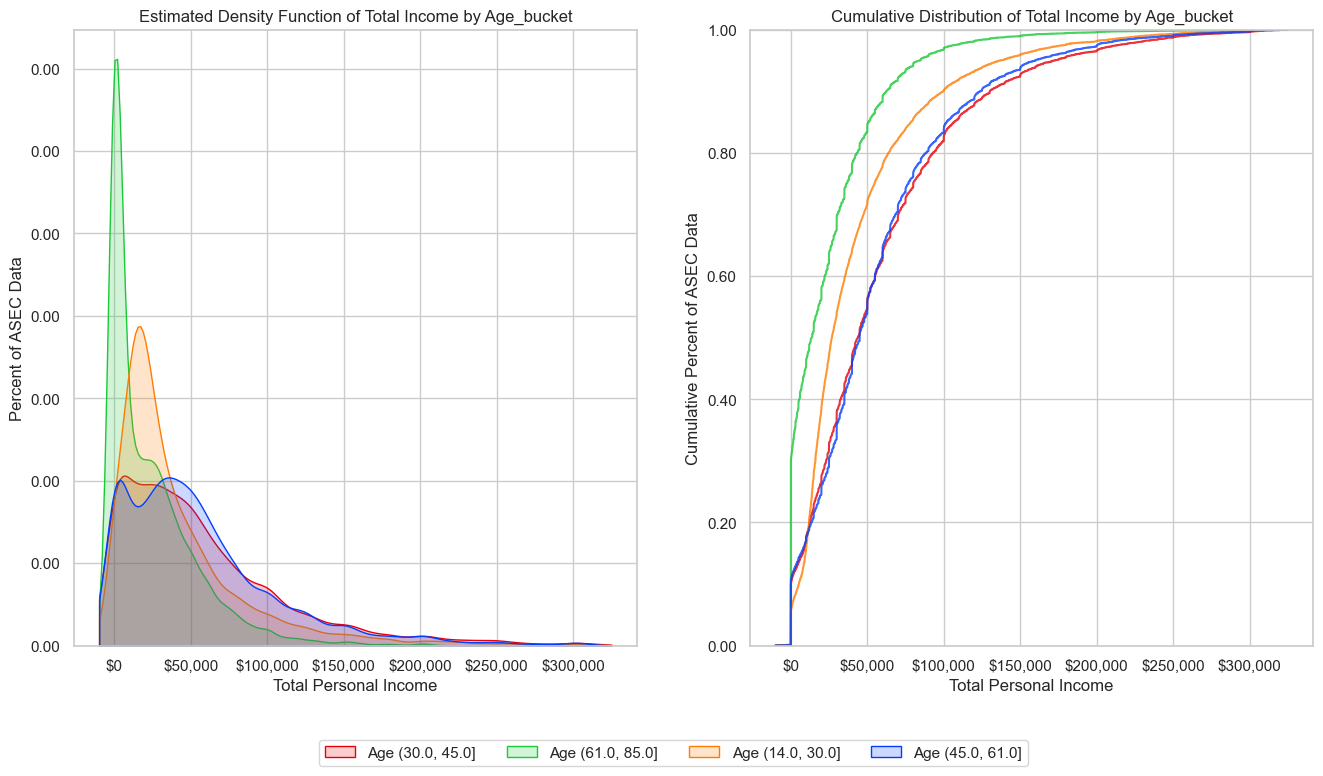

In [53]:
den_cdf_plot_by_x(df, 'Age_bucket', 'INCTOT_2', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 152732 to 152732
reducing groups from 6 to 10


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


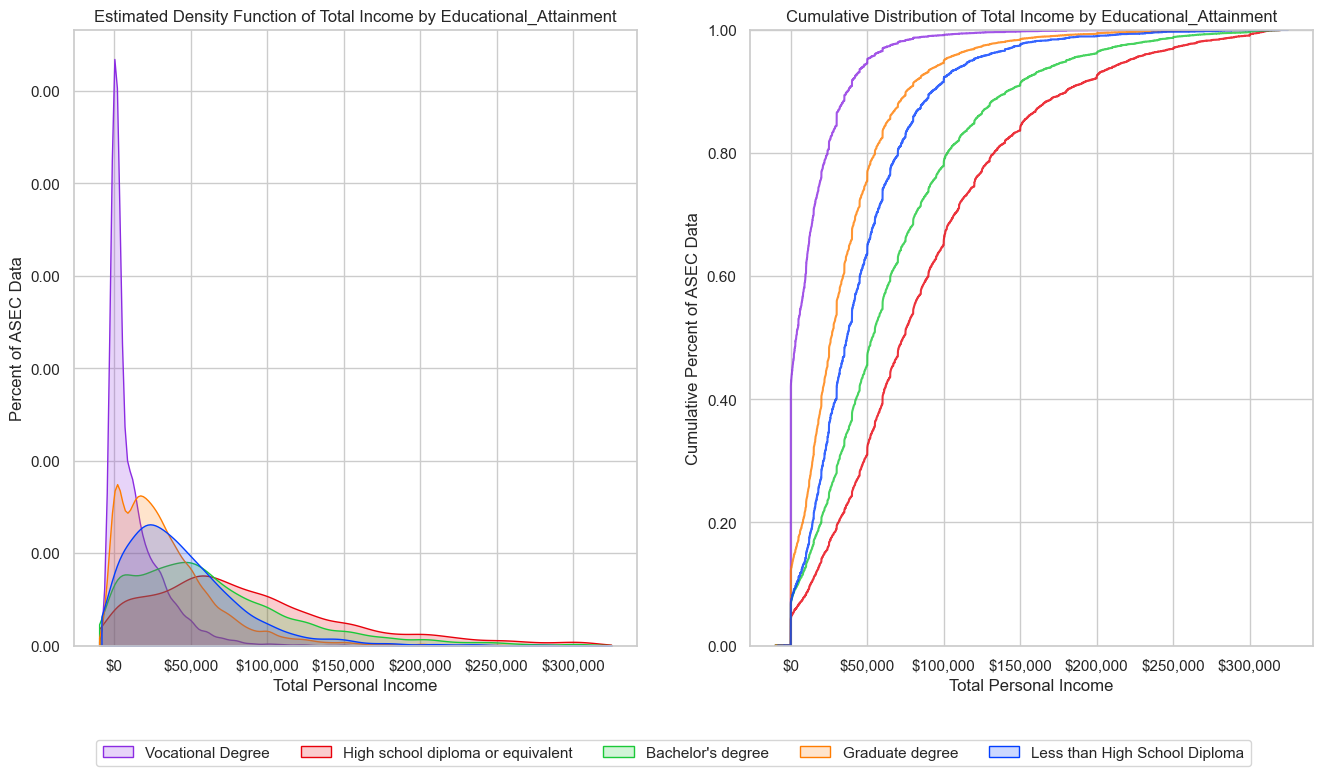

In [56]:
den_cdf_plot_by_x(df, 'Educational_Attainment', 'INCTOT_2', 'ASECWT', k=10, bbox=(0.5, -0.05), legend_ncol=5, max_percentile=0.99)

reducing records from 152732 to 147254
reducing groups from 26 to 5


/var/folders/0f/j3495cjn7f71jcy4ffxb049c0000gn/T/ipykernel_4185/331875114.py:149: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


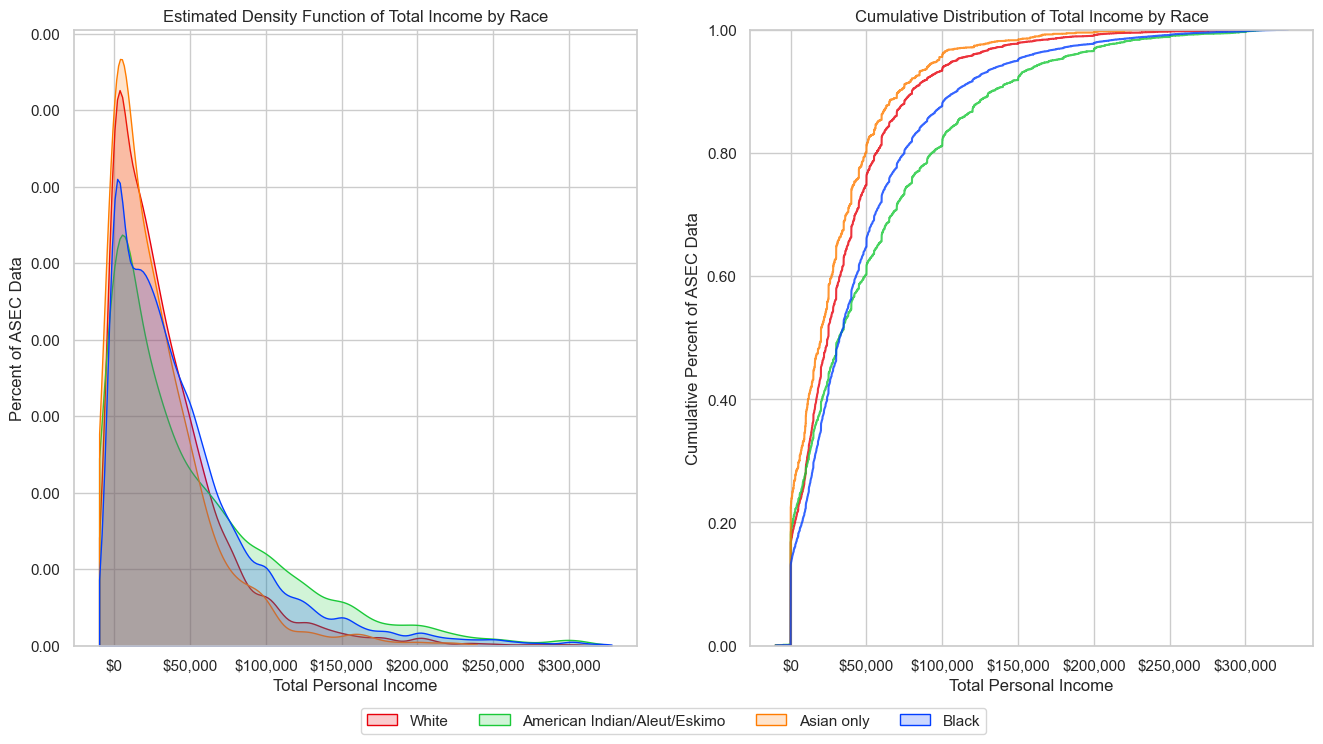

In [59]:
den_cdf_plot_by_x(df, 'Race', 'INCTOT_2', 'ASECWT', k=5, bbox=(0.5, -0.01), legend_ncol=5, max_percentile=0.99)

In [60]:
def denbyplot(df, colname, byvar, weightvar):
    f, ax = plt.subplots(1, figsize=(12, 8))
    groups = df[byvar].unique()
    labels = []
    for i, g in enumerate(groups):
        f = (df[colname].isnull()==False) & (df[byvar]==g)    
        ax = df[f][f"{colname}_2"].plot(weight=df[f][weightvar], kind='density', grid=True)
        ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    #     ax.set_xlim([0, 1e6])
        label = ddi_codebook.get_variable_info(colname.replace("_2", "")).label.title().replace("'S", "'s")
        labels.append(label)
        ax.set_xlabel(f"{label}")

    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.set_ylabel(f"Percentage of ASEC Data")
    ax.legend(labels, 
              loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=2)

    plt.show()

In [61]:
pd.options.display.max_columns = 100

In [62]:
df.head().T

,0,1,2,3,4
YEAR,2022,2022,2022,2022,2022
ASECWTH,2553.13,1586.8,1586.8,1492.59,1492.59
STATEFIP,23,23,23,23,23
STAMPVAL,0,0,0,0,0
WTFINL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
Veteran_Status,No service,No service,No service,No service,No service
Age_bucket,"Age (30.0, 45.0]","Age (61.0, 85.0]","Age (61.0, 85.0]","Age (14.0, 30.0]","Age (14.0, 30.0]"
income_null,False,False,False,False,False
Age,42.0,62.0,64.0,26.0,24.0


<Axes: >

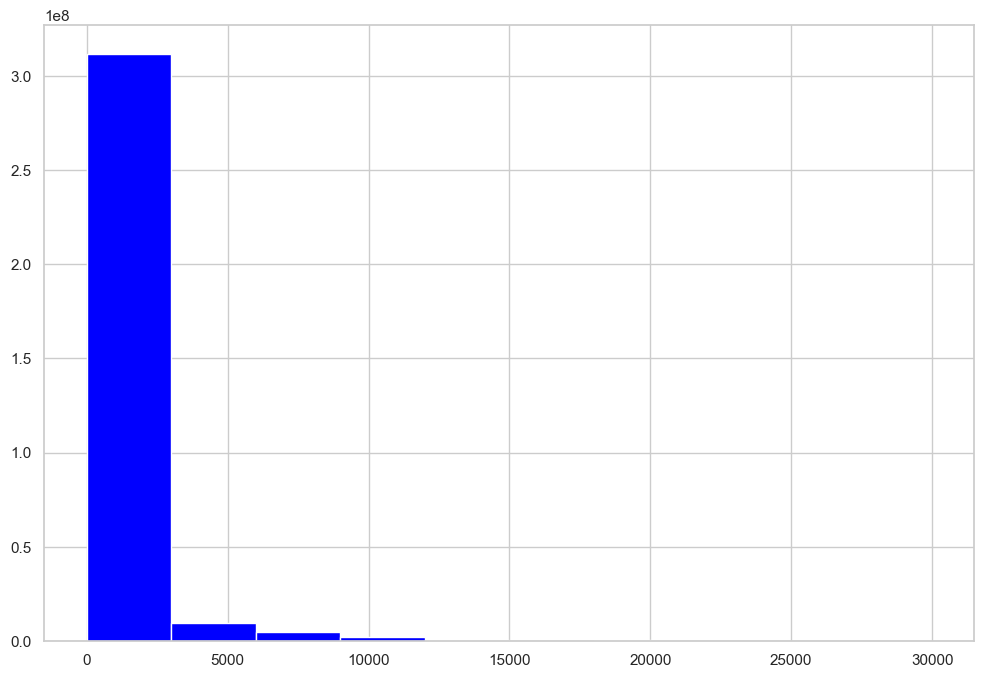

In [63]:
df['FOODSTAMP'].hist(weights=df['ASECWT'], color='blue')

In [ ]:
x = pt(ddi_codebook, df, 'EDUC')

In [ ]:
{k: 1 for k in x['EDUC'].values}

In [ ]:
pt(ddi_codebook, ipums_df, 'EMPSTAT')

In [ ]:
ipums_df['OCC'].describe().round()

In [ ]:
for col in cps_ddi['columns']:
    print(ddi_codebook.get_variable_info(col).description)
    print("*"*40)

In [ ]:
def weighted_quantiles_interpolate(values, weights, quantiles=0.5):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    q = np.searchsorted(c, quantiles * c[-1])
    return np.where(c[q]/c[-1] == quantiles, 0.5 * (values[i[q]] + values[i[q+1]]), values[i[q]])

def weighted_mode(data, weights):
    if len(data) != len(weights):
        raise ValueError("The length of data and weights must be the same.")

    values, counts = np.unique(data, return_counts=True)
    weighted_counts = np.zeros_like(counts, dtype=float)

    for i, value in enumerate(values):
        indices = np.where(data == value)
        weighted_counts[i] = np.sum(weights[indices])

    max_count = np.max(weighted_counts)
    mode = values[np.where(weighted_counts == max_count)]

    return mode.tolist()

In [ ]:
weighted_mode(df['AGE'].values, df['ASECWT'].values)

In [ ]:
df['AGE'].mode()

In [ ]:
df.shape

In [ ]:
print(ddi_codebook.get_variable_info("INCTOT").description)

In [ ]:
f, ax = plt.subplots(1)
ax = df[df['INCTOT'] < 5e6].sample(n=1000).plot(
    kind='scatter', x='AGE', y='INCTOT', 
    figsize=(12, 8), ax=ax, grid=True,
)
# max_val = dfss[dfss['INCTOT'] < 5e6]['INCTOT'].max()
# ax.set_ylim([0, max_val])

ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(['${:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


plt.xlabel('Age')
plt.ylabel('Income')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# # Put a legend below current axis
# ax.legend(['Age'], 
#           loc='upper center', bbox_to_anchor=(0.5, -0.1),
#           fancybox=True, shadow=True, ncol=2)
plt.show()

In [ ]:
np.average(df['AGE'], weights=df['ASECWT'])

In [ ]:
weighted_quantiles_interpolate(df['AGE'].values, weights=df['ASECWT'].values, quantiles=0.5)

In [ ]:
df['AGE'].hist(density=1, bins=30, weights=df['ASECWT'], color='blue', figsize=(12, 8))
plt.xlabel('Reported Age in Years')
plt.show()

In [ ]:
f, ax = plt.subplots(1)
ax = df['AGE'].plot(kind='density', grid=True, figsize=(12, 8))
ax.set_xlim([0, 100])
# ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
# plt.title()
plt.xlabel("Age")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
# Put a legend below current axis
ax.legend(['Age'], 
          loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)

plt.show()

In [ ]:
dfss[filt1|filt2]['INCWAGE'].describe()

In [ ]:
xvar = 'EMPSTAT'
print(ddi_codebook.get_variable_info(xvar).description)
print(ddi_codebook.get_variable_info(xvar).codes)

In [ ]:
dfss['EMPSTAT'].describe()

In [ ]:
filt1 = (dfss['YEAR']==2021) & (dfss['EDUCD'] <= 113) & ((dfss['EMPSTAT']==1) | (dfss['EMPSTAT']==0))
filt2 = (dfss['YEAR']==2021) & (dfss['EDUCD'] > 113) & ((dfss['EMPSTAT']==1) | (dfss['EMPSTAT']==0))

f, ax = plt.subplots(1)
ax = dfss[filt1]['INCWAGE'].plot(kind='density', grid=True, figsize=(12, 8))
ax = dfss[filt2]['INCWAGE'].plot(kind='density', grid=True, title="Wage Income by Educational Attainment for People in the Labor Force (ACS 2021)")
ax.set_xlim([0, 1e6])
# ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
# plt.title()
plt.xlabel("Wage Income")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(['Less than a Graduate Degree', 'Graduate Degree or more'], 
          loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)

plt.show()

In [ ]:
def gen_plot(df, xvar, codebook):
    xtitle = codebook.get_variable_info(xvar).label.title()
    filt1 = (df['YEAR']==2021) & (df['EDUCD'] <= 113) & ((df['EMPSTAT']==1) | (df['EMPSTAT']==0))
    filt2 = (df['YEAR']==2021) & (df['EDUCD'] > 113) & ((df['EMPSTAT']==1) | (df['EMPSTAT']==0))

    f, ax = plt.subplots(1)
    ax = df[filt1][xvar].plot(kind='hist', grid=True, figsize=(12, 8), weights=df[filt1]['PERWT'])
    ax = df[filt2][xvar].plot(kind='hist', grid=True, weights=df[filt2]['PERWT'], title=f"{xtitle} by Educational Attainment for People in the Labor Force (ACS 2021)")
    max_val = df[xvar].max()
    ax.set_xlim([0, max_val])
    ax.set_xticklabels(['${:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    plt.xlabel(xtitle)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(['Less than a Graduate Degree', 'Graduate Degree or more'], 
              loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=2)
    plt.show()

In [ ]:
print([j for j in cps_ddi['columns'] if 'INC' in j])

In [ ]:
for j in cps_ddi['columns']:
    if 'INC' in j:
        gen_plot(dfss, j, ddi_codebook)
        print("*"*40)

In [ ]:
gen_plot(dfss, 'INCWAGE', ddi_codebook)